#### **Importing the Necessary Python Libraries.**

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import stats
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette("deep")
import plotly.graph_objects as ply
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

 **Problem Statement -**

You are requested to create an Indian credit risk(default) model, using the data provided in the spreadsheet.

**Hints:**

* Dependent variable - We need to create a default variable that should take the value of 1 when net worth next year is negative & 0 when net worth next year is positive.

* Validation Dataset -  We need to build the model on a train dataset and check the model performance measures on the validation dataset.

**Loading the Dataset CSV file of Problem Statement.**

In [2]:
df_1 = pd.read_csv('Company(FRA).csv')
pd.options.display.max_columns = None

**Checking the Records of the Dataset.**

In [3]:
df_1.head(10) # Head of the Dataset - First 10 Records of the Dataset.

Num  Networth Next Year  Total assets  Net worth  Total income  \
0    1               395.3         827.6      336.5         534.1   
1    2                36.2          67.7       24.3         137.9   
2    3                84.0         238.4       78.9         331.2   
3    4              2041.4        6883.5     1443.3        8448.5   
4    5                41.8          90.9       47.0         388.6   
5    6               291.5         573.8      238.6         582.6   
6    7                93.3         329.9       92.5          17.3   
7    8               985.1        5435.2     1013.6        1921.2   
8    9               188.6         526.1      117.2         946.1   
9   10               229.6         280.9       95.9        1272.0   

   Change in stock  Total expenses  Profit after tax  PBDITA    PBT  \
0             13.5           508.7              38.9   124.4   64.6   
1             -3.7           131.0               3.2     5.5    1.0   
2            -18.1           309.2               3.9    25.8   10.5   
3            212.2          8482.4             178.3   418.4  185.1   
4              3.4           392.7              -0.7     7.2   -0.6   
5             31.0           565.3              48.3   110.1   68.5   
6              0.1            16.0               1.4    14.0    6.4   
7             76.6          2047.1             -49.3   248.1  -49.3   
8             21.9           919.3              48.7   108.6   71.2   
9             15.7          1280.0               7.7    31.8   12.5   

   Cash profit  PBDITA as % of total income  PBT as % of total income  \
0         95.2                        23.29                     12.10   
1          3.8                         3.99                      0.73   
2          9.4                         7.79                      3.17   
3        178.0                         4.95                      2.19   
4          3.9                         1.85                     -0.15   
5         82.6                        18.90                     11.76   
6          6.8                        80.92                     36.99   
7        157.9                        12.91                     -2.57   
8         66.5                        11.48                      7.53   
9         14.8                         2.50                      0.98   

   PAT as % of total income  Cash profit as % of total income  \
0                      7.28                             17.82   
1                      2.32                              2.76   
2                      1.18                              2.84   
3                      2.11                              2.11   
4                     -0.18                              1.00   
5                      8.29                             14.18   
6                      8.09                             39.31   
7                     -2.57                              8.22   
8                      5.15                              7.03   
9                      0.61                              1.16   

   PAT as % of net worth   Sales  Income from fincial services  Other income  \
0                  12.27   533.5                           0.6           NaN   
1                   0.00   135.5                           NaN           0.2   
2                   5.07   330.6                           0.6           NaN   
3                  13.17  8444.2                           2.0           NaN   
4                  -1.48   387.6                           0.2           0.8   
5                  21.65   573.9                           7.3           0.7   
6                   1.50    12.2                           0.6           NaN   
7                  -5.92  1864.0                          57.1           NaN   
8                  52.88   898.2                           1.4           2.4   
9                   0.00  1270.7                           0.1           1.2   

   Total capital  Reserves and funds  Borrowings  \
0       

In [4]:
df_1.tail(10) # Tail of the Dataset - Last 10 Rows of the Dataset.

Num  Networth Next Year  Total assets  Net worth  Total income  \
4246  4247               135.5         651.2      118.4         961.2   
4247  4248                47.0         100.4       43.2         273.6   
4248  4249                81.4         225.8       70.8         435.9   
4249  4250               383.1        1591.9      375.6        3717.2   
4250  4251               336.5         455.2      197.8         199.2   
4251  4252                 0.2           0.4        0.2           NaN   
4252  4253                93.3         159.6       86.7         172.9   
4253  4254               932.2         833.8      664.6        2314.7   
4254  4255                64.6          95.0       48.5         110.5   
4255  4256                 0.0         384.6      111.3         345.8   

      Change in stock  Total expenses  Profit after tax  PBDITA    PBT  \
4246              6.2           939.6              27.8    78.0   28.7   
4247              1.3           271.3               3.6    13.6    6.0   
4248             23.5           449.5               9.9    25.9   15.3   
4249            -29.7          3681.5               6.0    81.1   13.7   
4250              NaN           193.3               5.9    59.1    6.7   
4251              NaN             NaN               NaN     NaN    NaN   
4252              0.1           169.7               3.3    18.4    3.7   
4253             32.1          2151.6             195.2   348.4  303.0   
4254              4.6           113.5               1.6     9.7    2.6   
4255             11.3           341.7              15.4    57.6   20.7   

      Cash profit  PBDITA as % of total income  PBT as % of total income  \
4246         60.2                         8.11                      2.99   
4247          7.1                         4.97                      2.19   
4248         18.9                         5.94                      3.51   
4249          5.7                         2.18                      0.37   
4250         35.9                        29.67                      3.36   
4251          NaN                         0.00                      0.00   
4252         12.6                        10.64                      2.14   
4253        219.5                        15.05                     13.09   
4254          6.7                         8.78                      2.35   
4255         34.8                        16.66                      5.99   

      PAT as % of total income  Cash profit as % of total income  \
4246                      2.89                              6.26   
4247                      1.32                              2.60   
4248                      2.27                              4.34   
4249                      0.16                              0.15   
4250                      2.96                             18.02   
4251                      0.00                              0.00   
4252                      1.91                              7.29   
4253                      8.43                              9.48   
4254                      1.45                              6.06   
4255                      4.45                             10.06   

      PAT as % of net worth   Sales  Income from fincial services  \
4246                  32.42   957.1                           0.7   
4247                   8.65   272.4                           0.4   
4248                  15.23   434.8                           1.0   
4249                   1.60  3669.8                           9.2   
4250                   3.03   198.8                           NaN   
4251                   0.00     NaN                           NaN   
4252                   3.88   172.1                           0.4   
4253                  33.55  2309.4                           3.0   
4254                   4.08   110.0                           0.1   
4255                  16.04   338.3                           1.1   

      Other income  Total capital  Reserve

**Dropping the Num Columns.**

In [5]:
df_1.drop("Num",axis= 1,inplace=True)

In [6]:
df_1.head(10) #Checking the Head of the Dataset after dropping the Num column.

Networth Next Year  Total assets  Net worth  Total income  Change in stock  \
0               395.3         827.6      336.5         534.1             13.5   
1                36.2          67.7       24.3         137.9             -3.7   
2                84.0         238.4       78.9         331.2            -18.1   
3              2041.4        6883.5     1443.3        8448.5            212.2   
4                41.8          90.9       47.0         388.6              3.4   
5               291.5         573.8      238.6         582.6             31.0   
6                93.3         329.9       92.5          17.3              0.1   
7               985.1        5435.2     1013.6        1921.2             76.6   
8               188.6         526.1      117.2         946.1             21.9   
9               229.6         280.9       95.9        1272.0             15.7   

   Total expenses  Profit after tax  PBDITA    PBT  Cash profit  \
0           508.7              38.9   124.4   64.6         95.2   
1           131.0               3.2     5.5    1.0          3.8   
2           309.2               3.9    25.8   10.5          9.4   
3          8482.4             178.3   418.4  185.1        178.0   
4           392.7              -0.7     7.2   -0.6          3.9   
5           565.3              48.3   110.1   68.5         82.6   
6            16.0               1.4    14.0    6.4          6.8   
7          2047.1             -49.3   248.1  -49.3        157.9   
8           919.3              48.7   108.6   71.2         66.5   
9          1280.0               7.7    31.8   12.5         14.8   

   PBDITA as % of total income  PBT as % of total income  \
0                        23.29                     12.10   
1                         3.99                      0.73   
2                         7.79                      3.17   
3                         4.95                      2.19   
4                         1.85                     -0.15   
5                        18.90                     11.76   
6                        80.92                     36.99   
7                        12.91                     -2.57   
8                        11.48                      7.53   
9                         2.50                      0.98   

   PAT as % of total income  Cash profit as % of total income  \
0                      7.28                             17.82   
1                      2.32                              2.76   
2                      1.18                              2.84   
3                      2.11                              2.11   
4                     -0.18                              1.00   
5                      8.29                             14.18   
6                      8.09                             39.31   
7                     -2.57                              8.22   
8                      5.15                              7.03   
9                      0.61                              1.16   

   PAT as % of net worth   Sales  Income from fincial services  Other income  \
0                  12.27   533.5                           0.6           NaN   
1                   0.00   135.5                           NaN           0.2   
2                   5.07   330.6                           0.6           NaN   
3                  13.17  8444.2                           2.0           NaN   
4                  -1.48   387.6                           0.2           0.8   
5                  21.65   573.9                           7.3           0.7   
6                   1.50    12.2                           0.6           NaN   
7                  -5.92  1864.0                          57.1           NaN   
8                  52.88   898.2                           1.4           2.4   
9                   0.00  1270.7                           0.1           1.2   

   Total capital  Reserves and funds  Borrowings  \
0           87.6               249.0       390.7   
1          

**Conclusion -**

We are going to drop the column Num as this column didn't contribute for analysis and model building excercise , because Num  for each entry in the dataset is unique hence it is useless for the model.That's why we decided to drop this column.

**Data Dictionary for Business Problem Statement.**

In [7]:
#from IPython.display import Image
#Image(filename="Data_Dictonary.png")

**Creating a Dependent Variable ('Default')**

**Hint -**
Dependent variable - We need to create a default variable that should take the value of 1 when net worth next year is negative & 0 when net worth next year is positive.

In [8]:
df_1['Default'] = np.where(df_1['Networth Next Year'] < 0, 1, 0)

In [9]:
df_1.drop("Networth Next Year",axis= 1,inplace=True)

In [10]:
df_1.head() #checking the dependent variable ('Default')

Total assets  Net worth  Total income  Change in stock  Total expenses  \
0         827.6      336.5         534.1             13.5           508.7   
1          67.7       24.3         137.9             -3.7           131.0   
2         238.4       78.9         331.2            -18.1           309.2   
3        6883.5     1443.3        8448.5            212.2          8482.4   
4          90.9       47.0         388.6              3.4           392.7   

   Profit after tax  PBDITA    PBT  Cash profit  PBDITA as % of total income  \
0              38.9   124.4   64.6         95.2                        23.29   
1               3.2     5.5    1.0          3.8                         3.99   
2               3.9    25.8   10.5          9.4                         7.79   
3             178.3   418.4  185.1        178.0                         4.95   
4              -0.7     7.2   -0.6          3.9                         1.85   

   PBT as % of total income  PAT as % of total income  \
0                     12.10                      7.28   
1                      0.73                      2.32   
2                      3.17                      1.18   
3                      2.19                      2.11   
4                     -0.15                     -0.18   

   Cash profit as % of total income  PAT as % of net worth   Sales  \
0                             17.82                  12.27   533.5   
1                              2.76                   0.00   135.5   
2                              2.84                   5.07   330.6   
3                              2.11                  13.17  8444.2   
4                              1.00                  -1.48   387.6   

   Income from fincial services  Other income  Total capital  \
0                           0.6           NaN           87.6   
1                           NaN           0.2           11.9   
2                           0.6           NaN           25.0   
3                           2.0           NaN          100.0   
4                           0.2           0.8           10.7   

   Reserves and funds  Borrowings  Current liabilities & provisions  \
0               249.0       390.7                              43.9   
1                 4.3        16.6                              23.7   
2                56.7        44.7                             102.2   
3              1343.3      2789.3                            2650.8   
4                35.8        25.5                              14.1   

   Deferred tax liability  Shareholders funds  Cumulative retained profits  \
0                    56.4               336.5                        248.9   
1                     3.1                24.3                         -8.2   
2                     9.8                78.9                         53.1   
3                     0.1              1443.3                        593.3   
4                     4.3                47.0                         35.8   

   Capital employed  TOL/TNW  Total term liabilities / tangible net worth  \
0             727.2     1.28                                         0.99   
1              40.9     1.53                                         0.21   
2             123.6     1.70                                         0.33   
3            4232.6     3.69                                         0.22   
4              72.5     0.81                                         0.44   

   Contingent liabilities / Net worth (%)  Contingent liabilities  \
0                                  186.21                   626.6   
1                                   47.74                    11.6   
2                                   30.42                    24.0   
3                                   10.79                   155.7   
4                                    0.00                     NaN   

   Net fixed assets  Investments  Current assets  Net working capital  \
0             461.1         18.1           257.6               

In [11]:
df_1.tail()

Total assets  Net worth  Total income  Change in stock  Total expenses  \
4251           0.4        0.2           NaN              NaN             NaN   
4252         159.6       86.7         172.9              0.1           169.7   
4253         833.8      664.6        2314.7             32.1          2151.6   
4254          95.0       48.5         110.5              4.6           113.5   
4255         384.6      111.3         345.8             11.3           341.7   

      Profit after tax  PBDITA    PBT  Cash profit  \
4251               NaN     NaN    NaN          NaN   
4252               3.3    18.4    3.7         12.6   
4253             195.2   348.4  303.0        219.5   
4254               1.6     9.7    2.6          6.7   
4255              15.4    57.6   20.7         34.8   

      PBDITA as % of total income  PBT as % of total income  \
4251                         0.00                      0.00   
4252                        10.64                      2.14   
4253                        15.05                     13.09   
4254                         8.78                      2.35   
4255                        16.66                      5.99   

      PAT as % of total income  Cash profit as % of total income  \
4251                      0.00                              0.00   
4252                      1.91                              7.29   
4253                      8.43                              9.48   
4254                      1.45                              6.06   
4255                      4.45                             10.06   

      PAT as % of net worth   Sales  Income from fincial services  \
4251                   0.00     NaN                           NaN   
4252                   3.88   172.1                           0.4   
4253                  33.55  2309.4                           3.0   
4254                   4.08   110.0                           0.1   
4255                  16.04   338.3                           1.1   

      Other income  Total capital  Reserves and funds  Borrowings  \
4251           NaN            0.5                -0.1         NaN   
4252           NaN           81.4                 5.3        39.5   
4253           1.7           74.9               589.7        39.4   
4254           0.4           11.2                35.3        13.3   
4255           NaN            9.6               138.3       146.7   

      Current liabilities & provisions  Deferred tax liability  \
4251                               NaN                     NaN   
4252                              33.4                     NaN   
4253                             116.1                    13.7   
4254                              33.2                     NaN   
4255                              62.5                    27.5   

      Shareholders funds  Cumulative retained profits  Capital employed  \
4251                 0.2                         -0.3               0.2   
4252                86.7                          5.3             126.2   
4253               664.6                        477.2             704.0   
4254                48.5                          4.8              61.8   
4255               111.3                        107.3             258.0   

      TOL/TNW  Total term liabilities / tangible net worth  \
4251     0.00                                         0.00   
4252     0.82                                         0.46   
4253     0.15                                         0.00   
4254     0.92                                         0.18   
4255     1.84                                         0.68   

      Contingent liabilities / Net worth (%)  Contingent liabilities  \
4251                                    0.00                     NaN   
4252                                    8.42                     7.3   
4253                                   15.72                   104.5   
4254                                    0.00                     NaN   
4

**Fixing messy column names (containing spaces) for ease of use**

In [12]:
df_1.columns = df_1.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('&', 'and')

In [13]:
df_1.columns

Index(['Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock',
       'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit',
       'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income',
       'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income',
       'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_fincial_services',
       'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_and_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_

**Checking the Summary of the Dataset.**

In [14]:
df_1.describe().T

count          mean  \
Total_assets                                    4256.0  3.573617e+03   
Net_worth                                       4256.0  1.351950e+03   
Total_income                                    4025.0  4.688190e+03   
Change_in_stock                                 3706.0  4.370248e+01   
Total_expenses                                  4091.0  4.356301e+03   
Profit_after_tax                                4102.0  2.950506e+02   
PBDITA                                          4102.0  6.059406e+02   
PBT                                             4102.0  4.102590e+02   
Cash_profit                                     4102.0  4.082675e+02   
PBDITA_as_perc_of_total_income                  4177.0  3.179892e+00   
PBT_as_perc_of_total_income                     4177.0 -1.819683e+01   
PAT_as_perc_of_total_income                     4177.0 -2.003367e+01   
Cash_profit_as_perc_of_total_income             4177.0 -9.021278e+00   
PAT_as_perc_of_net_worth                        4256.0  1.016786e+01   
Sales                                           3951.0  4.645685e+03   
Income_from_fincial_services                    3145.0  8.136006e+01   
Other_income                                    2700.0  5.595289e+01   
Total_capital                                   4251.0  2.245577e+02   
Reserves_and_funds                              4158.0  1.210562e+03   
Borrowings                                      3825.0  1.176248e+03   
Current_liabilities_and_provisions              4146.0  9.606314e+02   
Deferred_tax_liability                          2887.0  2.344951e+02   
Shareholders_funds                              4256.0  1.376487e+03   
Cumulative_retained_profits                     4211.0  9.371820e+02   
Capital_employed                                4256.0  2.433618e+03   
TOL_to_TNW                                      4256.0  4.025343e+00   
Total_term_liabilities__to__tangible_net_worth  4256.0  1.854288e+00   
Contingent_liabilities__to__Net_worth_perc      4256.0  5.570750e+01   
Contingent_liabilities                          2854.0  9.485522e+02   
Net_fixed_assets                                4124.0  1.209487e+03   
Investments                                     2541.0  7.218659e+02   
Current_assets                                  4176.0  1.350360e+03   
Net_working_capital                             4219.0  1.628742e+02   
Quick_ratio_times                               4151.0  1.497355e+00   
Current_ratio_times                             4151.0  2.257398e+00   
Debt_to_equity_ratio_times                      4256.0  2.871563e+00   
Cash_to_current_liabilities_times               4151.0  5.284197e-01   
Cash_to_average_cost_of_sales_per_day           4156.0  1.451579e+02   
Creditors_turnover                              3865.0  1.681226e+01   
Debtors_turnover                                3871.0  1.792903e+01   
Finished_goods_turnover                         3382.0  8.436999e+01   
WIP_turnover                                    3492.0  2.868451e+01   
Raw_material_turnover                           3828.0  1.773393e+01   
Shares_outstanding                              3446.0  2.376491e+07   
Equity_face_value                               3446.0 -1.094829e+03   
EPS                                             4256.0 -1.962175e+02   
Adjusted_EPS                                    4256.0 -1.975276e+02   
Total_liabilities                               4256.0  3.573617e+03   
PE_on_BSE                                       1629.0  5.546229e+01   
Default                                         4256.0  5.498120e-02   

                                                         std           min  \
Total_assets                                    3.007444e+04  1.000000e-01   
Net_worth                                       1.296131e+04  0.000000e+00   
Total_income                                    5.391895e+04  0.000000e+00   
Change_in_stock                                 4.369150e+02 -3.

**Observations -**

From the above table we can infer the count,mean, std , 25% , 50% ,75% and min & max values of the all variables present in the dataset.

**Checking the Shape of the Dataframe.**

In [15]:
df_1.shape

(4256, 50)

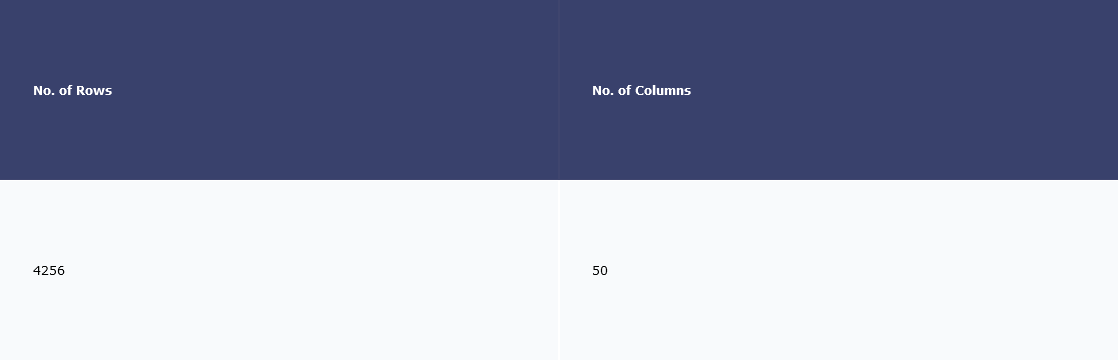

In [16]:
shape = [['No. of Rows', 'No. of Columns'],
        [4256 , 50]]
table = ff.create_table(shape)
table

**Insights -**

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The Company(FRA) .csv data set has 4256 observations (rows) and 50 variables (columns) in the dataset.

**Checking the Appropriateness of Datatypes & Information of the Dataframe.**

In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 50 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Total_assets                                    4256 non-null   float64
 1   Net_worth                                       4256 non-null   float64
 2   Total_income                                    4025 non-null   float64
 3   Change_in_stock                                 3706 non-null   float64
 4   Total_expenses                                  4091 non-null   float64
 5   Profit_after_tax                                4102 non-null   float64
 6   PBDITA                                          4102 non-null   float64
 7   PBT                                             4102 non-null   float64
 8   Cash_profit                                     4102 non-null   float64
 9   PBDITA_as_perc_of_total_income           

**Insights -**

From the above results we can see that there are null values present in most of the columns.

There are total 4256 rows & 50 columns given in this dataset,indexed from 0 to 4255.

Out of 50 variables 49 are float64 and 1 variable is of int64 d-type. Memory used by the dataset: 1.6 MB.

**Checking for Null Values and % of null values present in each variable.**

In [18]:
null = pd.DataFrame(df_1.isnull().sum(), columns = ['Null'])
null['Null %'] = (df_1.isnull().sum() * 100/df_1.shape[0]).round(2)
null[null['Null'] > 0].sort_values(by = 'Null %', ascending = False)

Null  Null %
PE_on_BSE                              2627   61.72
Investments                            1715   40.30
Other_income                           1556   36.56
Contingent_liabilities                 1402   32.94
Deferred_tax_liability                 1369   32.17
Income_from_fincial_services           1111   26.10
Finished_goods_turnover                 874   20.54
Equity_face_value                       810   19.03
Shares_outstanding                      810   19.03
WIP_turnover                            764   17.95
Change_in_stock                         550   12.92
Borrowings                              431   10.13
Raw_material_turnover                   428   10.06
Creditors_turnover                      391    9.19
Debtors_turnover                        385    9.05
Sales                                   305    7.17
Total_income                            231    5.43
Total_expenses                          165    3.88
Profit_after_tax                        154    3.62
Cash_profit                             154    3.62
PBT                                     154    3.62
PBDITA                                  154    3.62
Net_fixed_assets                        132    3.10
Current_liabilities_and_provisions      110    2.58
Quick_ratio_times                       105    2.47
Current_ratio_times                     105    2.47
Cash_to_current_liabilities_times       105    2.47
Cash_to_average_cost_of_sales_per_day   100    2.35
Reserves_and_funds                       98    2.30
Current_assets                           80    1.88
Cash_profit_as_perc_of_total_income      79    1.86
PAT_as_perc_of_total_income              79    1.86
PBT_as_perc_of_total_income              79    1.86
PBDITA_as_perc_of_total_income           79    1.86
Cumulative_retained_profits              45    1.06
Net_working_capital                      37    0.87
Total_capital                             5    0.12

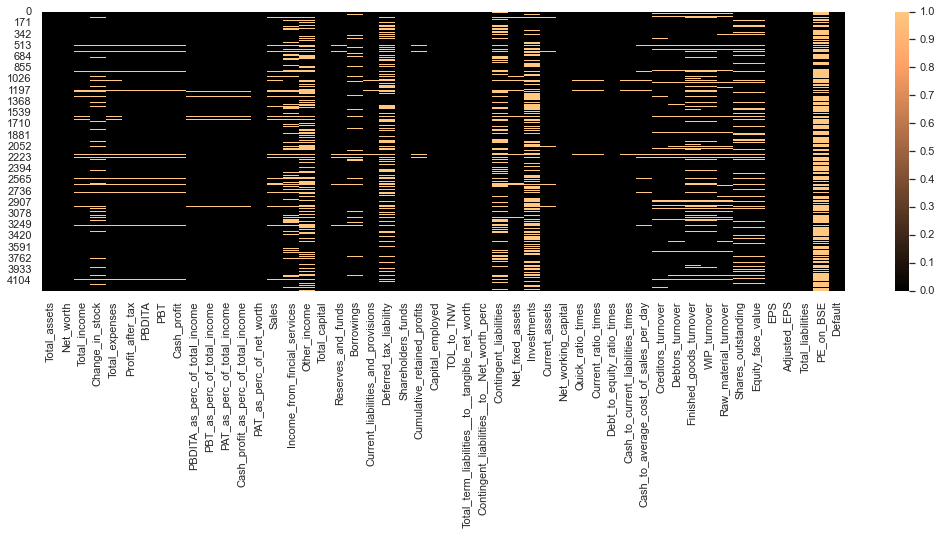

In [19]:
plt.figure(figsize = (18, 5))
ax = sns.heatmap(df_1.isnull(), cmap = "copper")
ax.tick_params(left = False, bottom = False)

**Note -**

We will decide to drop the columns which have null % more than 30 % , because as these columns have too much null values and these can't help us in our analysis.

In [20]:
df_1.drop(["PE_on_BSE","Investments","Other_income","Contingent_liabilities","Deferred_tax_liability"],axis=1 , inplace=True)

In [21]:
null = pd.DataFrame(df_1.isnull().sum(), columns = ['Null'])
null['Null %'] = (df_1.isnull().sum() * 100/df_1.shape[0]).round(2)
null[null['Null'] > 0].sort_values(by = 'Null %', ascending = False)

Null  Null %
Income_from_fincial_services           1111   26.10
Finished_goods_turnover                 874   20.54
Equity_face_value                       810   19.03
Shares_outstanding                      810   19.03
WIP_turnover                            764   17.95
Change_in_stock                         550   12.92
Borrowings                              431   10.13
Raw_material_turnover                   428   10.06
Creditors_turnover                      391    9.19
Debtors_turnover                        385    9.05
Sales                                   305    7.17
Total_income                            231    5.43
Total_expenses                          165    3.88
Profit_after_tax                        154    3.62
PBDITA                                  154    3.62
PBT                                     154    3.62
Cash_profit                             154    3.62
Net_fixed_assets                        132    3.10
Current_liabilities_and_provisions      110    2.58
Quick_ratio_times                       105    2.47
Cash_to_current_liabilities_times       105    2.47
Current_ratio_times                     105    2.47
Cash_to_average_cost_of_sales_per_day   100    2.35
Reserves_and_funds                       98    2.30
Current_assets                           80    1.88
PBDITA_as_perc_of_total_income           79    1.86
PBT_as_perc_of_total_income              79    1.86
PAT_as_perc_of_total_income              79    1.86
Cash_profit_as_perc_of_total_income      79    1.86
Cumulative_retained_profits              45    1.06
Net_working_capital                      37    0.87
Total_capital                             5    0.12

**Observation-** 

Now we have columns which have null % less than 30 %. We will impute these null values by using median i.e. as outliers is present in the data so median will be effective choice for null value imputation.

**Checking for Anomalies in the Dataset.**

In [22]:
for column in df_1[['Total_assets','Net_worth','Total_income','Change_in_stock',
                   'Total_expenses','Profit_after_tax','PBDITA','PBT','Cash_profit','PBDITA_as_perc_of_total_income',
                   'PBT_as_perc_of_total_income','PAT_as_perc_of_total_income','Cash_profit_as_perc_of_total_income',
                   'PAT_as_perc_of_net_worth','Sales','Income_from_fincial_services','Total_capital','Reserves_and_funds','Borrowings','Current_liabilities_and_provisions',
                    'Current_liabilities_and_provisions','Shareholders_funds','Cumulative_retained_profits',
                   'Capital_employed','TOL_to_TNW','Total_term_liabilities__to__tangible_net_worth',
                   'Contingent_liabilities__to__Net_worth_perc','Net_fixed_assets','Quick_ratio_times',
                   'Current_ratio_times','Debt_to_equity_ratio_times','Cash_to_current_liabilities_times',
                   'Cash_to_average_cost_of_sales_per_day','Creditors_turnover','Debtors_turnover','Finished_goods_turnover',
                   'WIP_turnover','Raw_material_turnover','Shares_outstanding','Equity_face_value',
                   'EPS','Adjusted_EPS','Total_liabilities','Default']]:
    print(column.upper(),': ',df_1[column].nunique())
    print(df_1[column].unique())
    print('\n*************************************************\n')

TOTAL_ASSETS :  2961
[ 827.6   67.7  238.4 ... 1591.9  159.6  833.8]

*************************************************

NET_WORTH :  2376
[336.5  24.3  78.9 ... 123.8  35.3 664.6]

*************************************************

TOTAL_INCOME :  2870
[ 534.1  137.9  331.2 ... 3717.2  172.9 2314.7]

*************************************************

CHANGE_IN_STOCK :  1164
[ 13.5  -3.7 -18.1 ...  41.4 306.5 321.6]

*************************************************

TOTAL_EXPENSES :  2898
[ 508.7  131.   309.2 ... 3681.5  169.7 2151.6]

*************************************************

PROFIT_AFTER_TAX :  1467
[ 38.9   3.2   3.9 ... 458.6  27.8 195.2]

*************************************************

PBDITA :  1826
[124.4   5.5  25.8 ...  81.1  18.4 348.4]

*************************************************

PBT :  1568
[ 64.6   1.   10.5 ... 467.9  75.4 303. ]

*************************************************

CASH_PROFIT :  1655
[ 95.2   3.8   9.4 ... 718.4 820.3 219.5]

********

 3.900e+00 3.440e+00 3.025e+01 3.070e+00]

*************************************************

CURRENT_RATIO_TIMES :  517
[2.520e+00 1.110e+00 1.310e+00 1.280e+00 2.090e+00 1.580e+00 1.200e-01
 6.800e-01 1.120e+00 1.360e+00 8.800e-01 7.000e-01 1.170e+00 8.600e-01
 7.700e-01 1.230e+00 7.600e-01 8.400e-01 5.200e+00 5.400e-01 1.770e+00
 1.352e+01 1.220e+00 1.190e+00 1.000e+00 8.700e-01 1.510e+00 1.070e+00
 1.930e+00 5.000e+00 1.030e+00 1.210e+00 9.100e-01 1.380e+00 1.480e+00
 3.764e+01 1.740e+00 2.300e+00 1.090e+00 1.160e+00 0.000e+00 1.520e+00
 1.080e+00 1.560e+00 1.450e+00 1.240e+00 1.570e+00 1.530e+00 1.270e+00
 9.300e-01 1.440e+00 1.400e+00 1.200e+01 1.010e+00 2.340e+00 8.100e-01
 2.500e-01 7.300e-01 1.750e+00       nan 1.620e+00 1.390e+00 4.000e-02
 2.110e+00 7.200e-01 1.130e+00 7.500e-01 9.800e-01 1.100e+00 8.300e-01
 3.840e+00 2.870e+00 1.260e+00 3.440e+00 1.060e+00 3.900e-01 1.410e+00
 1.250e+00 2.260e+00 2.220e+00 1.020e+00 1.290e+00 5.050e+02 1.370e+00
 9.400e-01 7.100e-01 1.350e

**Observation-**

There is no Anomalies present in the dataset , but have nan values in most of columns.

**Checking Duplicate Values**

In [23]:
dups=df_1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 665


In [24]:
df_1.drop_duplicates(inplace = True)

In [25]:
dups_1=df_1.duplicated()
print('Number of duplicate rows = %d' % (dups_1.sum()))

Number of duplicate rows = 0


**Observation -**

There is no duplicates rows present in the dataset.

In [26]:
df_1.shape

(3591, 45)

In [27]:
df_1.reset_index(inplace=True)

In [28]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 46 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   index                                           3591 non-null   int64  
 1   Total_assets                                    3591 non-null   float64
 2   Net_worth                                       3591 non-null   float64
 3   Total_income                                    3387 non-null   float64
 4   Change_in_stock                                 3113 non-null   float64
 5   Total_expenses                                  3448 non-null   float64
 6   Profit_after_tax                                3457 non-null   float64
 7   PBDITA                                          3457 non-null   float64
 8   PBT                                             3457 non-null   float64
 9   Cash_profit                              

In [29]:
df_1.shape

(3591, 46)

In [30]:
df_1.drop("index",axis= 1,inplace=True)

In [31]:
df_1.shape

(3591, 45)

**Observation -**  As index column is not worthy for our analysis that's why we decide to drop it. Now we have columns which are useful for our model building excercise.

**Checking the Value counts on Dependent Variable ('Default').**

In [32]:
df_1["Default"].value_counts(normalize=True).round(3) * 100

0    93.5
1     6.5
Name: Default, dtype: float64

In [33]:
vaule_count_table = [['Proportion of 1s and 0s','Ratio'],
        [0,93.5],
        [1, 6.5]]
table = ff.create_table(vaule_count_table)
table

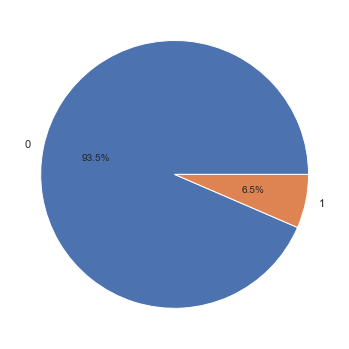

In [34]:
plt.figure(figsize=(10,6))
plt.pie(df_1["Default"].value_counts(),labels=df_1["Default"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Observation -**

93.5% of the data-points belongs to class 0.

Only 6.5% of the data-points belongs to class 1.

**Univariate Analysis of Numerical Variables -**

A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observation per bin is represented by the height of the bar. It is possible to represent the distribution of several variable on the same axis using this technique.

A box-plot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.

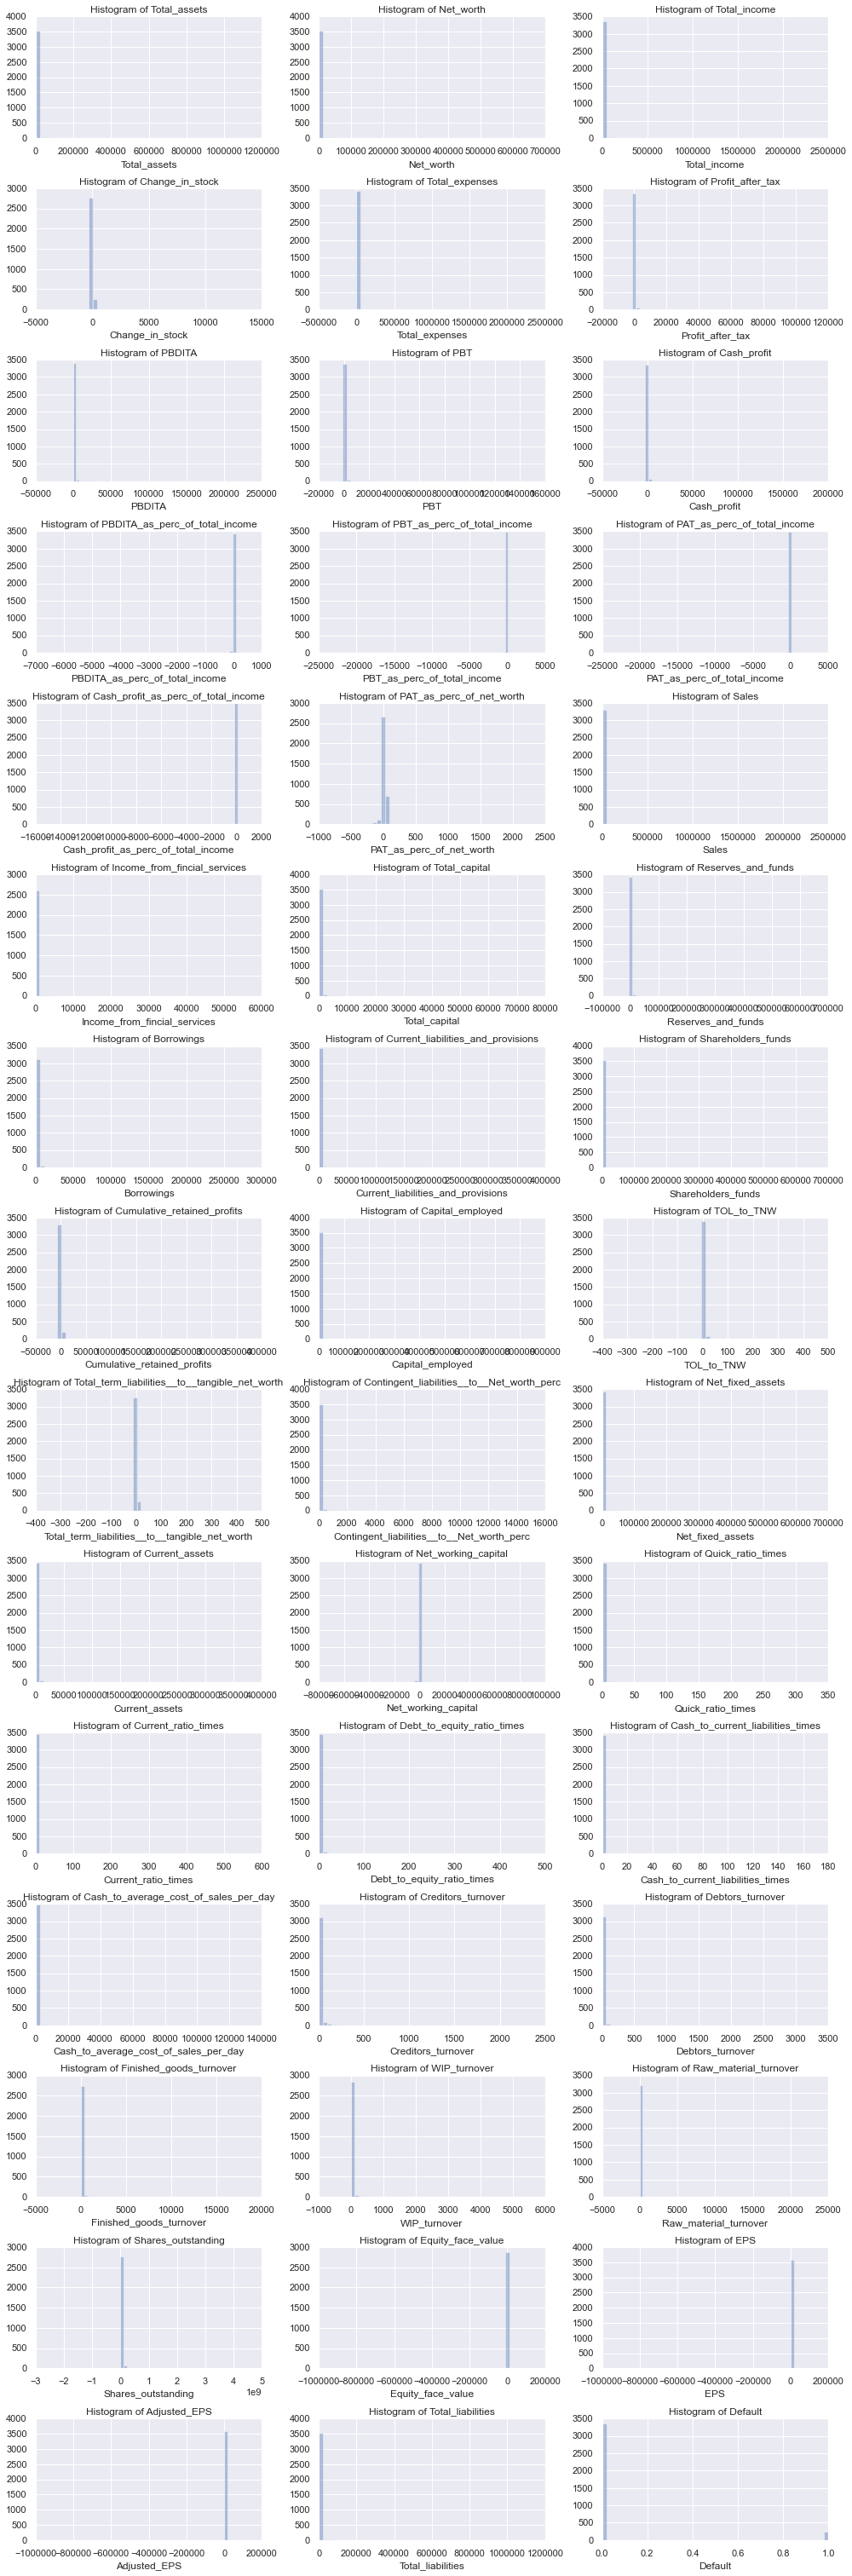

In [35]:
plt.figure(figsize = (14,50))
for i in range(len(df_1.columns)):
    plt.subplot(18, 3, i+1)
    sns.distplot(df_1[df_1.columns[i]], kde=False)
    plt.title('Histogram of {}'.format(df_1.columns[i]))
    plt.tight_layout()

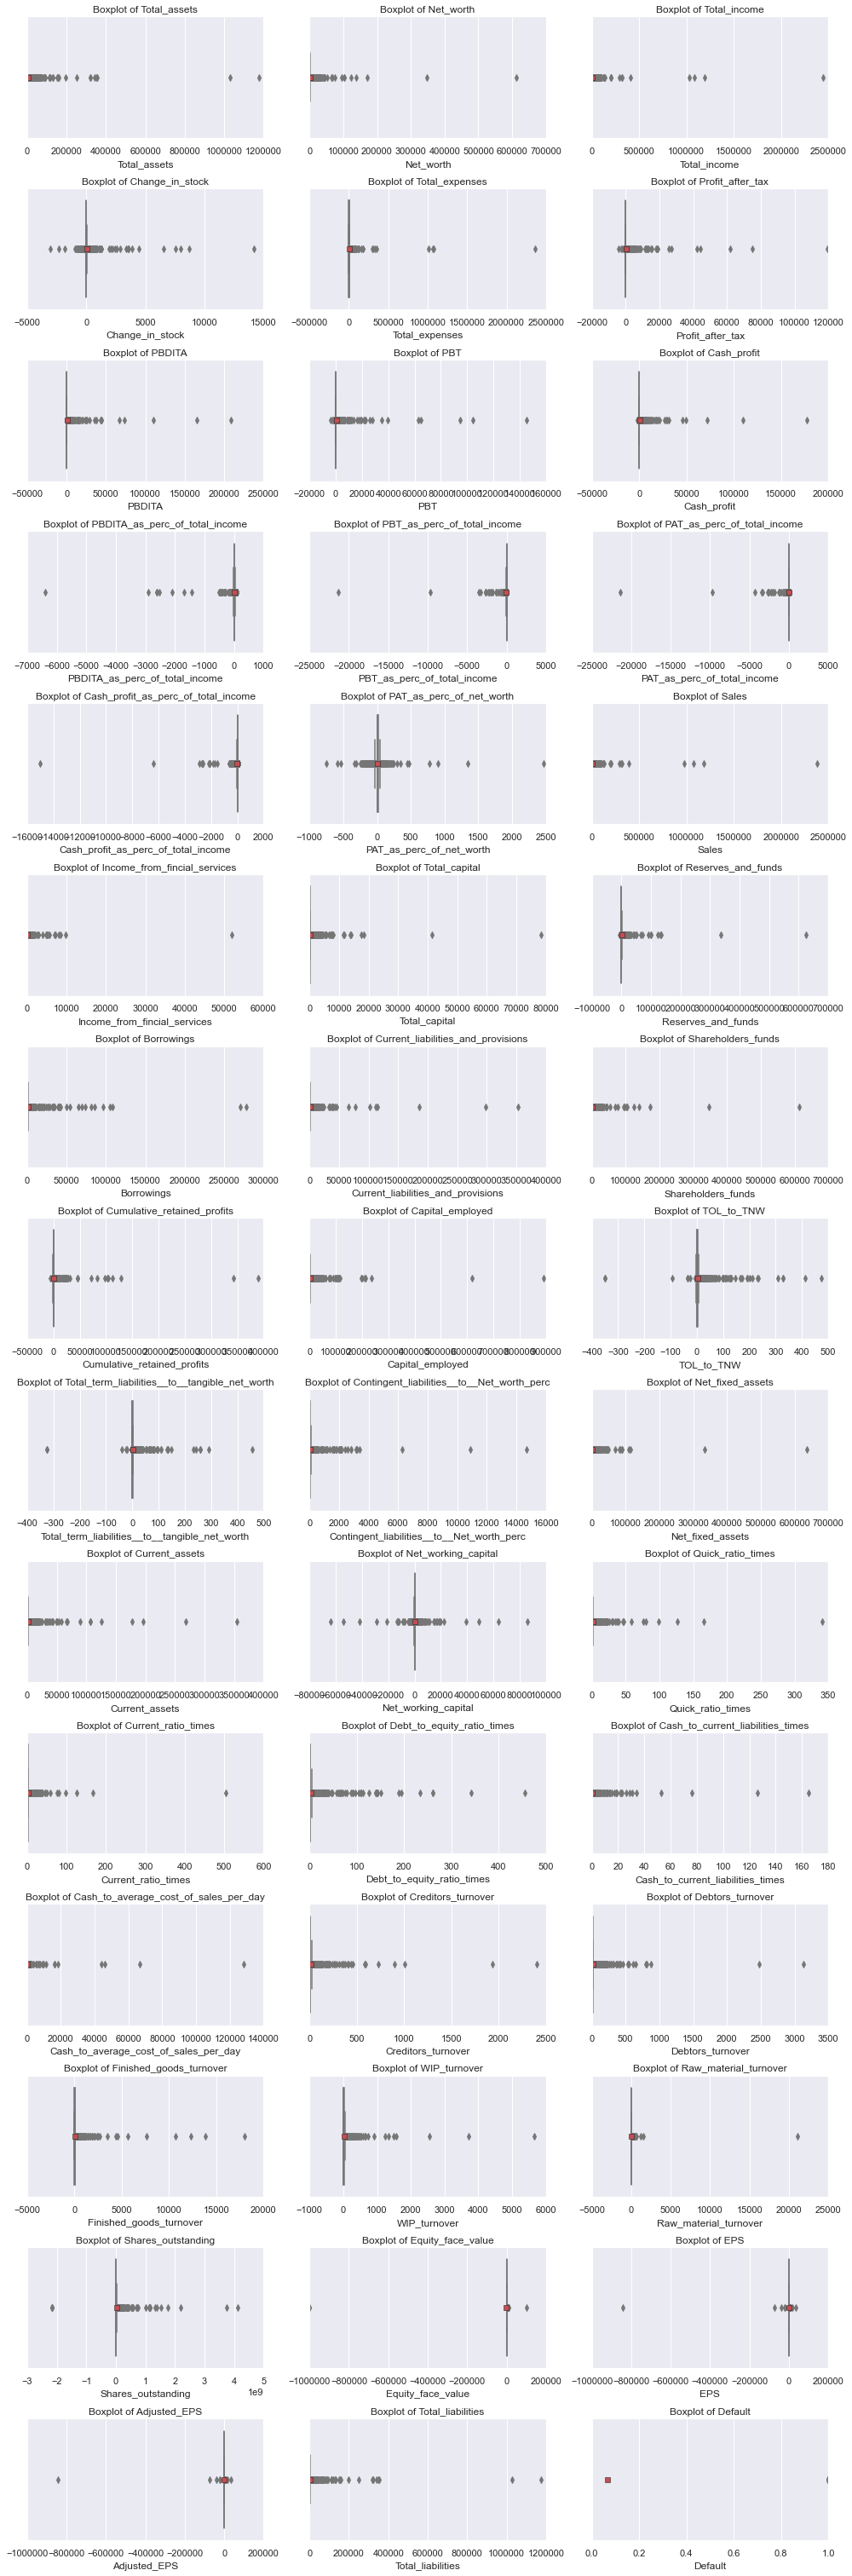

In [36]:
plt.figure(figsize = (14,50))
for i in range(len(df_1.columns)):
    plt.subplot(18, 3, i+1)
    sns.boxplot(x = df_1[df_1.columns[i]], data = df_1, showmeans = True, palette = 'Paired')
    plt.title('Boxplot of {}'.format(df_1.columns[i]))
    plt.tight_layout()

**Insights of Univariate Analysis**

**Insights -**

* Total_assets -  Total assets of customer ranges from a minimum of 0.100 to maximum of 1176509.

* Average Total assets of customer is around 3575.297.

* Total_assets has outliers.

* Net_worth -  Net worth of the customer of present year ranges from a minimum of 0.00 to maximum of 613151.60.

* Average Net worth of the customer of present year is around 1352.58.

* Net_worth has outliers.

*  Total_income -  Total income of the customer ranges from a minimum of 0.00 to maximum of 2442828.


* Average Total income of the customer is around 4688.190.

* Total_income has outliers.

* Change_in_stock -  difference between value of current stock and the value of stock in last trading day ranges from a minimum of -3029.400 to maximum of 14185.500.

* Average difference between value of current stock and the value of stock in last trading day is around 43.702.

* Change_in_stock has outliers.

* Total_expenses - Total expense done by customer ranges from a minimum of -0.100 to maximum of 2366035.

* Average of Total expense done by customer is around 4356.301.

* Total_expenses has outliers.

* Profit_after_tax -  Profit after tax deduction ranges from a minimum of -3908.300 to maximum of 119439.100.

* Average Profit after tax deduction is around  295.050.

* Profit_after_tax has outliers.

* PBDITA - Profit before depreciation, income tax and amortization ranges from a minimum of -440.700 to maximum of  208576.500.

* Average PBDITA is around  605.940.

* PBDITA has outliers.

* PBT - Profit before tax deduction ranges from a minimum of -3894.800 to maximum of 145292.600.

* Average Profit before tax deduction is around 410.259.

* PBT has outliers.

* Cash_profit -  Total Cash profit ranges from a minimum of -2245.700 to maximum of 176911.800.

* Average of  Total Cash profit is around 408.267.

* Cash_profit has outliers.

* PBDITA_as_perc_of_total_income -  PBDITA / Total income ranges from a minimum of -6400.00 to maximum of 100.00.

* Average PBDITA_as_perc_of_total_income is around  3.181.

*  PBDITA_as_perc_of_total_income  has outliers.

* PBT_as_perc_of_total_income -  PBT / Total income ranges from a minimum of -21340.00 to maximum of 100.00.

* Average PBT_as_perc_of_total_income is around  -18.205.

* PBT_as_perc_of_total_income has outliers.

*  PAT_as_perc_of_total_income -  PAT / Total income ranges from a minimum of  -21340.00 to maximum of 150.00.

* Average  PAT_as_perc_of_total_income is around -20.043.

*  PAT_as_perc_of_total_income  has outliers.

* Cash_profit_as_perc_of_total_income - Cash Profit / Total income ranges from a minimum of -15020.00 to maximum of 100.00.

* Average Cash_profit_as_perc_of_total_income  is around -9.025.

* Cash_profit_as_perc_of_total_income has outliers.

* PAT_as_perc_of_net_worth - PAT / Net worth ranges from a minimum of -748.720 to maximum of  2466.670.

* Average PAT_as_perc_of_net_worth is around 10.172.

* PAT_as_perc_of_net_worth has outliers.

* Sales - Sales done by customer ranges from a minimum of 0.100 to maximum of 2384984.

* Average Sales done by customer is around 4645.685.

* Sales has outliers.

* Total_capital - Total capital of the customer ranges from a minimum of 0.100 to maximum of  78273.200.

* Average Total capital of the customer is around 224.663.

* Total_capital has outliers.

* Reserves_and_funds -  Total reserves and funds of the customer ranges from a minimum of  -6525.900 to maximum of 625137.800.

* Average of Total reserves and funds of the customer is around 1210.561.

* Reserves_and_funds has outliers.

* Borrowings - Total amount borrowed by customer ranges from a minimum of 0.100 to maximum of  278257.300.

* Average Total amount borrowed by customer is around 1176.248.

* Borrowings has outliers.

* Current_liabilities_and_provisions -  current liabilities of the customer  ranges from a minimum of 0.100 to maximum of 352240.300.

* Average current liabilities of the customer is around 960.631.

* Current_liabilities_and_provisions has outliers.

* Shareholders_funds - Amount of equity in a company, which is belong to shareholder  ranges from a minimum of 0.00 to maximum of 613151.600.

* Average Amount of equity in a company, which is belong to shareholder  is 1377.133.

* Shareholders_funds has outliers.

* Cumulative_retained_profits - Total cumulative profit retained by customer ranges from a minimum of  -6534.300 to maximum of  390133.800.

* Average Total cumulative profit retained by customer is around  937.181.

* Cumulative_retained_profits has outliers.

* Capital_employed - Current asset minus current liabilities ranges from a minimum of 0.00 to maximum of 891408.900.

* Average Current asset minus current liabilities is around 2434.761.

* Capital_employed has outliers.

* TOL_to_TNW - Total liabilities of the customer divided by Total net worth ranges from a minimum of -350.480 to maximum of 473.00.

* Average TOL_to_TNW is around 4.027.

* TOL_to_TNW has outliers.

* Total_term_liabilities__to__tangible_net_worth - Short + long term liabilities divided by tangible net worth ranges from a minimum of -325.600 to maximum of 456.00.

* Average Total_term_liabilities__to__tangible_net_worth is around  1.855.

*  Total_term_liabilities__to__tangible_net_worth  has outliers.

* Contingent_liabilities__to__Net_worth_perc - Contingent liabilities / Net worth ranges from a minimum of 0.00 to maximum of 14704.270.

* Average Contingent_liabilities__to__Net_worth_perc is 55.733.

* Contingent_liabilities__to__Net_worth_perc has outliers.

*  Net_fixed_assets - purchase price of all fixed assets ranges from a minimum of 0.00 to maximum of 636604.600.

* Average Net_fixed_assets is around 1209.486.

*  Net_fixed_assets has outliers.

* Current_assets  - Assets that are expected to be converted to cash within a year ranges from a minimum of 0.100 to maximum of  354815.200.

* Average Current_assets  is around 1351.006.

* Current_assets has outliers.

* Net_working_capital - Difference of current liabilities and current assets ranges from a minimum of -63839.00 to maximum of 85782.800.

* Average Net_working_capital  is around  162.951.

* Net_working_capital has outliers.

* Quick_ratio_times - Total cash divided by current liabilities ranges from a minimum of 0.00 to maximum of 341.00.

* Average Quick_ratio_times  is around 1.497.

* Quick_ratio_times has outliers.

* Current_ratio_times - Current assets divided by current liabilities ranges from a minimum of 0.00 to maximum of 505.00.

* Average Current_ratio_times is around 2.257.

* Current_ratio_times  has outliers.

* Debt_to_equity_ratio_times - Total liabilities divided by its shareholder equity ranges from a minimum of 0.00 to maximum of  456.00.

* Average Debt_to_equity_ratio_times is around  2.872.

* Debt_to_equity_ratio_times has outliers.

* Cash_to_current_liabilities_times - Total liquid cash divided by current liabilities ranges from a minimum of 0.00 to maximum of 165.00.

* Average Cash_to_current_liabilities_times is around 0.528.

* Cash_to_current_liabilities_times has outliers.

* Cash_to_average_cost_of_sales_per_day  -  Total cash divided by average cost of the sales ranges from a minimum of 0.00 to maximum of 128040.760.

*  Average Cash_to_average_cost_of_sales_per_day is around  145.157.

*  Cash_to_average_cost_of_sales_per_day has outliers.

* Creditors_turnover -  Net credit purchase divided to average trade creditors ranges from a minimum of 0.00 to maximum of  2401.00.

* Average  Creditors_turnover is around  16.812.

* Creditors_turnover has outliers.

* Debtors_turnover - Net credit sales divided by average accounts receivable ranges from a minimum of 0.00 to maximum of  3135.200.

* Average Debtors_turnover is around 17.929.

* Debtors_turnover has outliers.

*  Finished_goods_turnover - Annual sales divided by average inventory ranges from a minimum of -0.090 to maximum of 17947.600.

* Average Finished_goods_turnover is around 84.369.

* Finished_goods_turnover  has outliers.

* WIP_turnover -  The cost of goods sold for a period divided by the average inventory for that period ranges from a minimum of -0.180 to maximum of 5651.400.

* Average WIP_turnover is around  28.684.

* WIP_turnover has outliers. 

* Raw_material_turnover  -  Cost of goods sold is divided by the average inventory for the same period ranges from a minimum of -2.000 to maximum of 21092.000.
 
* Average Raw_material_turnover is around  17.733.
 
* Raw_material_turnover has outliers.

* Shares_outstanding -  Number of issued shares minus the number of share held in the company ranges from a minimum of -2147484000 to maximum of 4130401000.
 
* Average Shares_outstanding is around 23764910.

* Shares_outstanding has outliers.

* Equity_face_value  -  cost of the equity at the time of issuing ranges from a minimum of -999998.900 to maximum of 100000.000.

* Average Equity_face_value  is around -1094.828.

* Equity_face_value has outliers.

* EPS  - Net income divided by total number of outstanding share ranges from a minimum of  -843181.820 to maximum of 34522.530.

* Average EPS is around -196.309.

* EPS has outliers.

* Adjusted_EPS -  Adjusted net earning divided by the weighted average number of common share outstanding on a diluted basis during the plan year ranges from a minimum of -843181.820 to maximum of 34522.530.

* Average Adjusted_EPS is around -197.620.

* Adjusted_EPS has outliers.

* Total_liabilities - Sum of all type of liabilities ranges from a minimum of 0.100 to maximum of 1176509.

* Average Total_liabilities is around 3575.297.

* Total_liabilities has outliers.



**Bivariate Analysis -**

**Scatter Plot -**

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

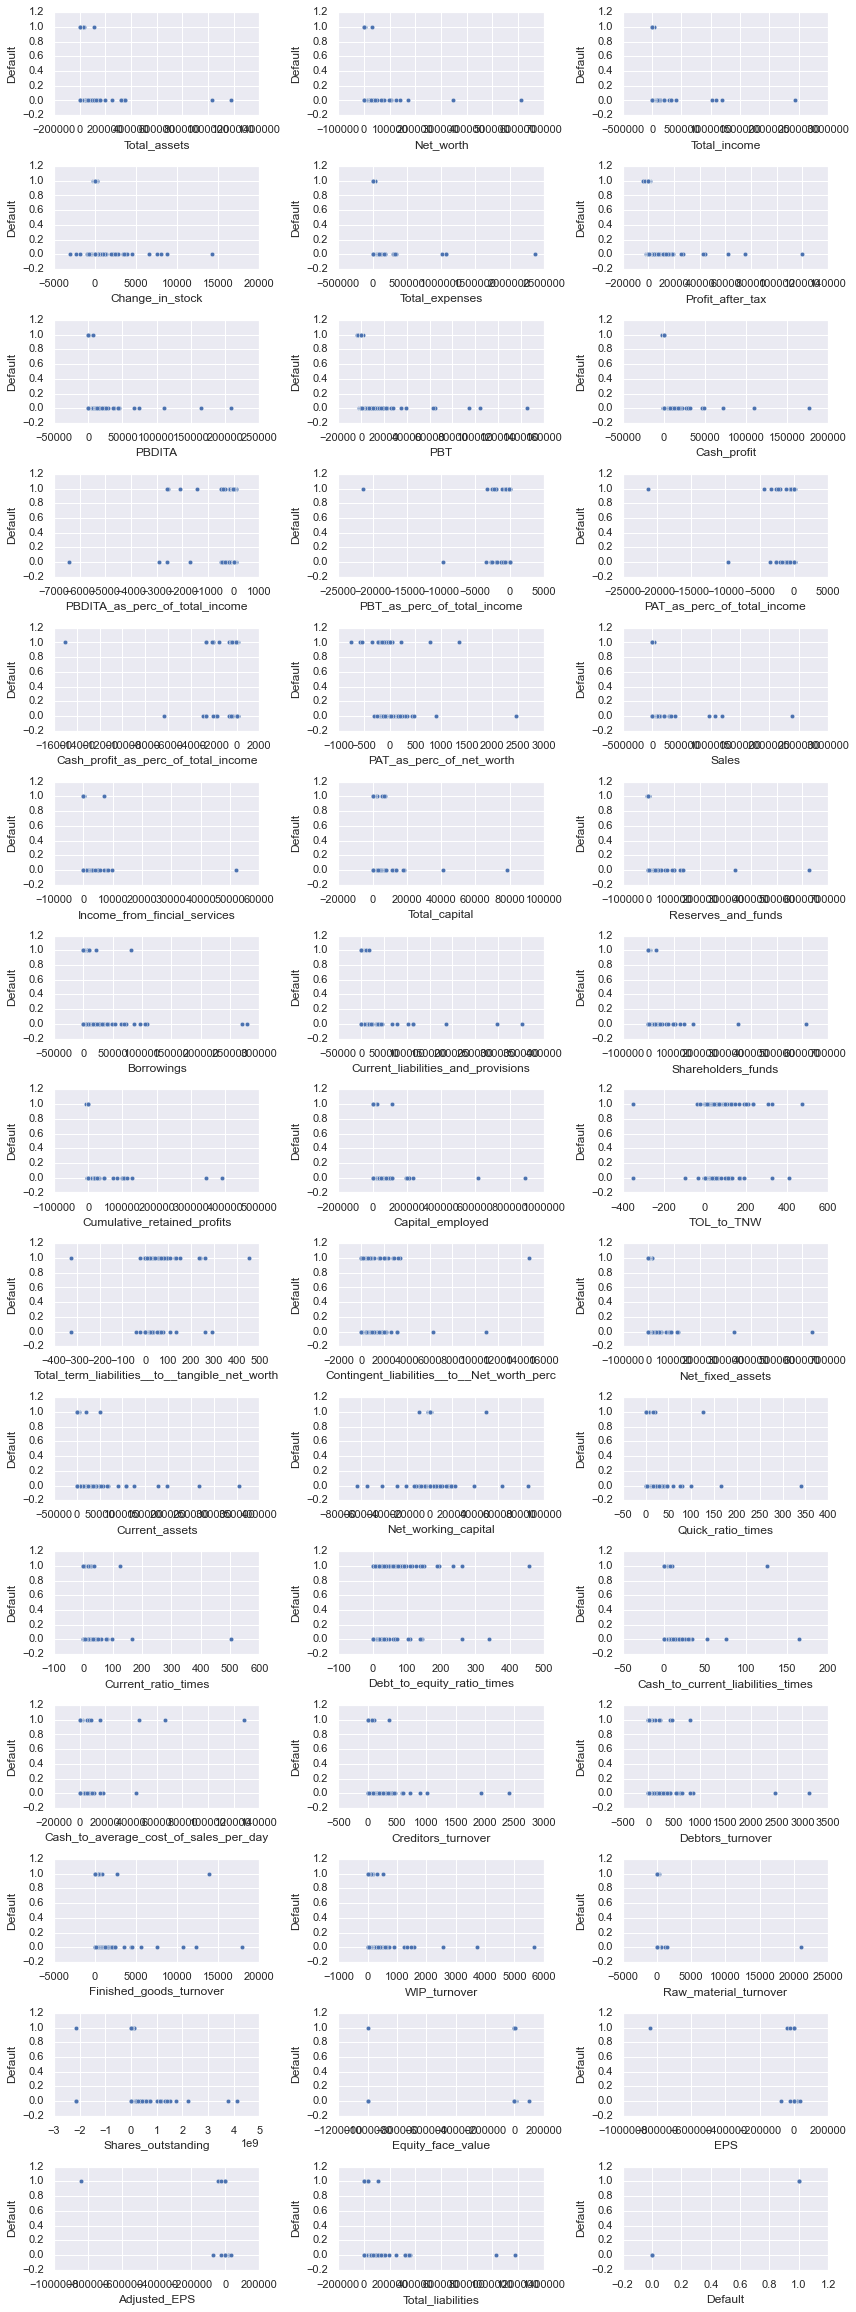

In [37]:
plt.figure(figsize = (12, 36))
for i in range(len(df_1.columns)):
    plt.subplot(17, 3, i + 1)
    sns.scatterplot(df_1[df_1.columns[i]], df_1.Default)
    plt.tight_layout()

**Insights -**

* For the upper range (-1000 – 0) of PBDITA as % of total income, chances are high that the customer will default.

* For the upper range (-4000 – 0) of PBT as % of total income, chances are high that the
  customer will default.
  
* For the upper range ( -5000 -0) of PAT as % of total income, chances are high that the
  customer will default.
  
* For the upper range (-3000 – 0 ) of Cash profit as % of total income, chances are high that the customer will default.

* For the lower range (-500 – 0) of PAT as % of net worth , chances are high that the
  customer will default.
  
* Customers in range 0-200 of TOL_to_TNW seem more likely to default.

* Customers in range 0-300 of Total_term_liabilities seem more likely to default.

* Customers in range 0-4000 of Contingent_liabilities seem more likely to default.

* Customers in range 0-250 of Debt_to_equity_ratio_times seem more likely to default.

* Customers in range 0-500 of creditors_turnover seems more likely to default.

* Customers in range 0-1000 of debtors_turnover seems more likely to default.

* Customers in range 0-2500 of Finished_goods_turnover seems more likely to default.

**Multivariate Analysis -**

**Heatmap -**

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types.Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.Darker Shades have higher Correlation , while lighter shades have smaller values of Correlation as compared to darker shades values.Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.

**Checking for Correlations -**

In [38]:
df_1.corr().T

Total_assets  Net_worth  \
Total_assets                                        1.000000   0.957997   
Net_worth                                           0.957997   1.000000   
Total_income                                        0.878478   0.793343   
Change_in_stock                                     0.448642   0.364907   
Total_expenses                                      0.864611   0.773151   
Profit_after_tax                                    0.915322   0.959397   
PBDITA                                              0.951888   0.966638   
PBT                                                 0.906469   0.939751   
Cash_profit                                         0.945808   0.981291   
PBDITA_as_perc_of_total_income                      0.009431   0.009338   
PBT_as_perc_of_total_income                         0.006666   0.006853   
PAT_as_perc_of_total_income                         0.006343   0.006449   
Cash_profit_as_perc_of_total_income                 0.006526   0.006768   
PAT_as_perc_of_net_worth                            0.019919   0.020573   
Sales                                               0.879903   0.796434   
Income_from_fincial_services                        0.722704   0.584680   
Total_capital                                       0.393558   0.394015   
Reserves_and_funds                                  0.951284   0.994336   
Borrowings                                          0.937806   0.885979   
Current_liabilities_and_provisions                  0.875264   0.726054   
Shareholders_funds                                  0.957298   0.999260   
Cumulative_retained_profits                         0.962579   0.975218   
Capital_employed                                    0.977004   0.983296   
TOL_to_TNW                                         -0.008600  -0.013467   
Total_term_liabilities__to__tangible_net_worth     -0.007911  -0.008851   
Contingent_liabilities__to__Net_worth_perc          0.001402  -0.002065   
Net_fixed_assets                                    0.943162   0.972707   
Current_assets                                      0.881651   0.747190   
Net_working_capital                                -0.077782  -0.070100   
Quick_ratio_times                                  -0.009585  -0.006856   
Current_ratio_times                                -0.009677  -0.006966   
Debt_to_equity_ratio_times                         -0.009177  -0.013474   
Cash_to_current_liabilities_times                  -0.004140  -0.002415   
Cash_to_average_cost_of_sales_per_day               0.045404   0.025385   
Creditors_turnover                                 -0.008679  -0.007331   
Debtors_turnover                                    0.008394   0.008445   
Finished_goods_turnover                            -0.008940  -0.007960   
WIP_turnover                                       -0.010111  -0.008942   
Raw_material_turnover                              -0.002679  -0.002240   
Shares_outstanding                                  0.431911   0.448959   
Equity_face_value                                   0.005063   0.005302   
EPS                                                 0.001174   0.003376   
Adjusted_EPS                                        0.001096   0.003294   
Total_liabilities                                   1.000000   0.957997   
Default                                            -0.017221  -0.021442   

                                                Total_income  Change_in_stock  \
Total_assets                                        0.878478         0.448642   
Net_worth                                           0.793343         0.364907   
Total_income                                        1.000000         0.246742   
Change_in_stock                                     0.246742         1.000000   
Total_expenses                                      0.999322         0.244419   
Profit_after_tax                                    0.753009         0.351912   
PBDITA                        

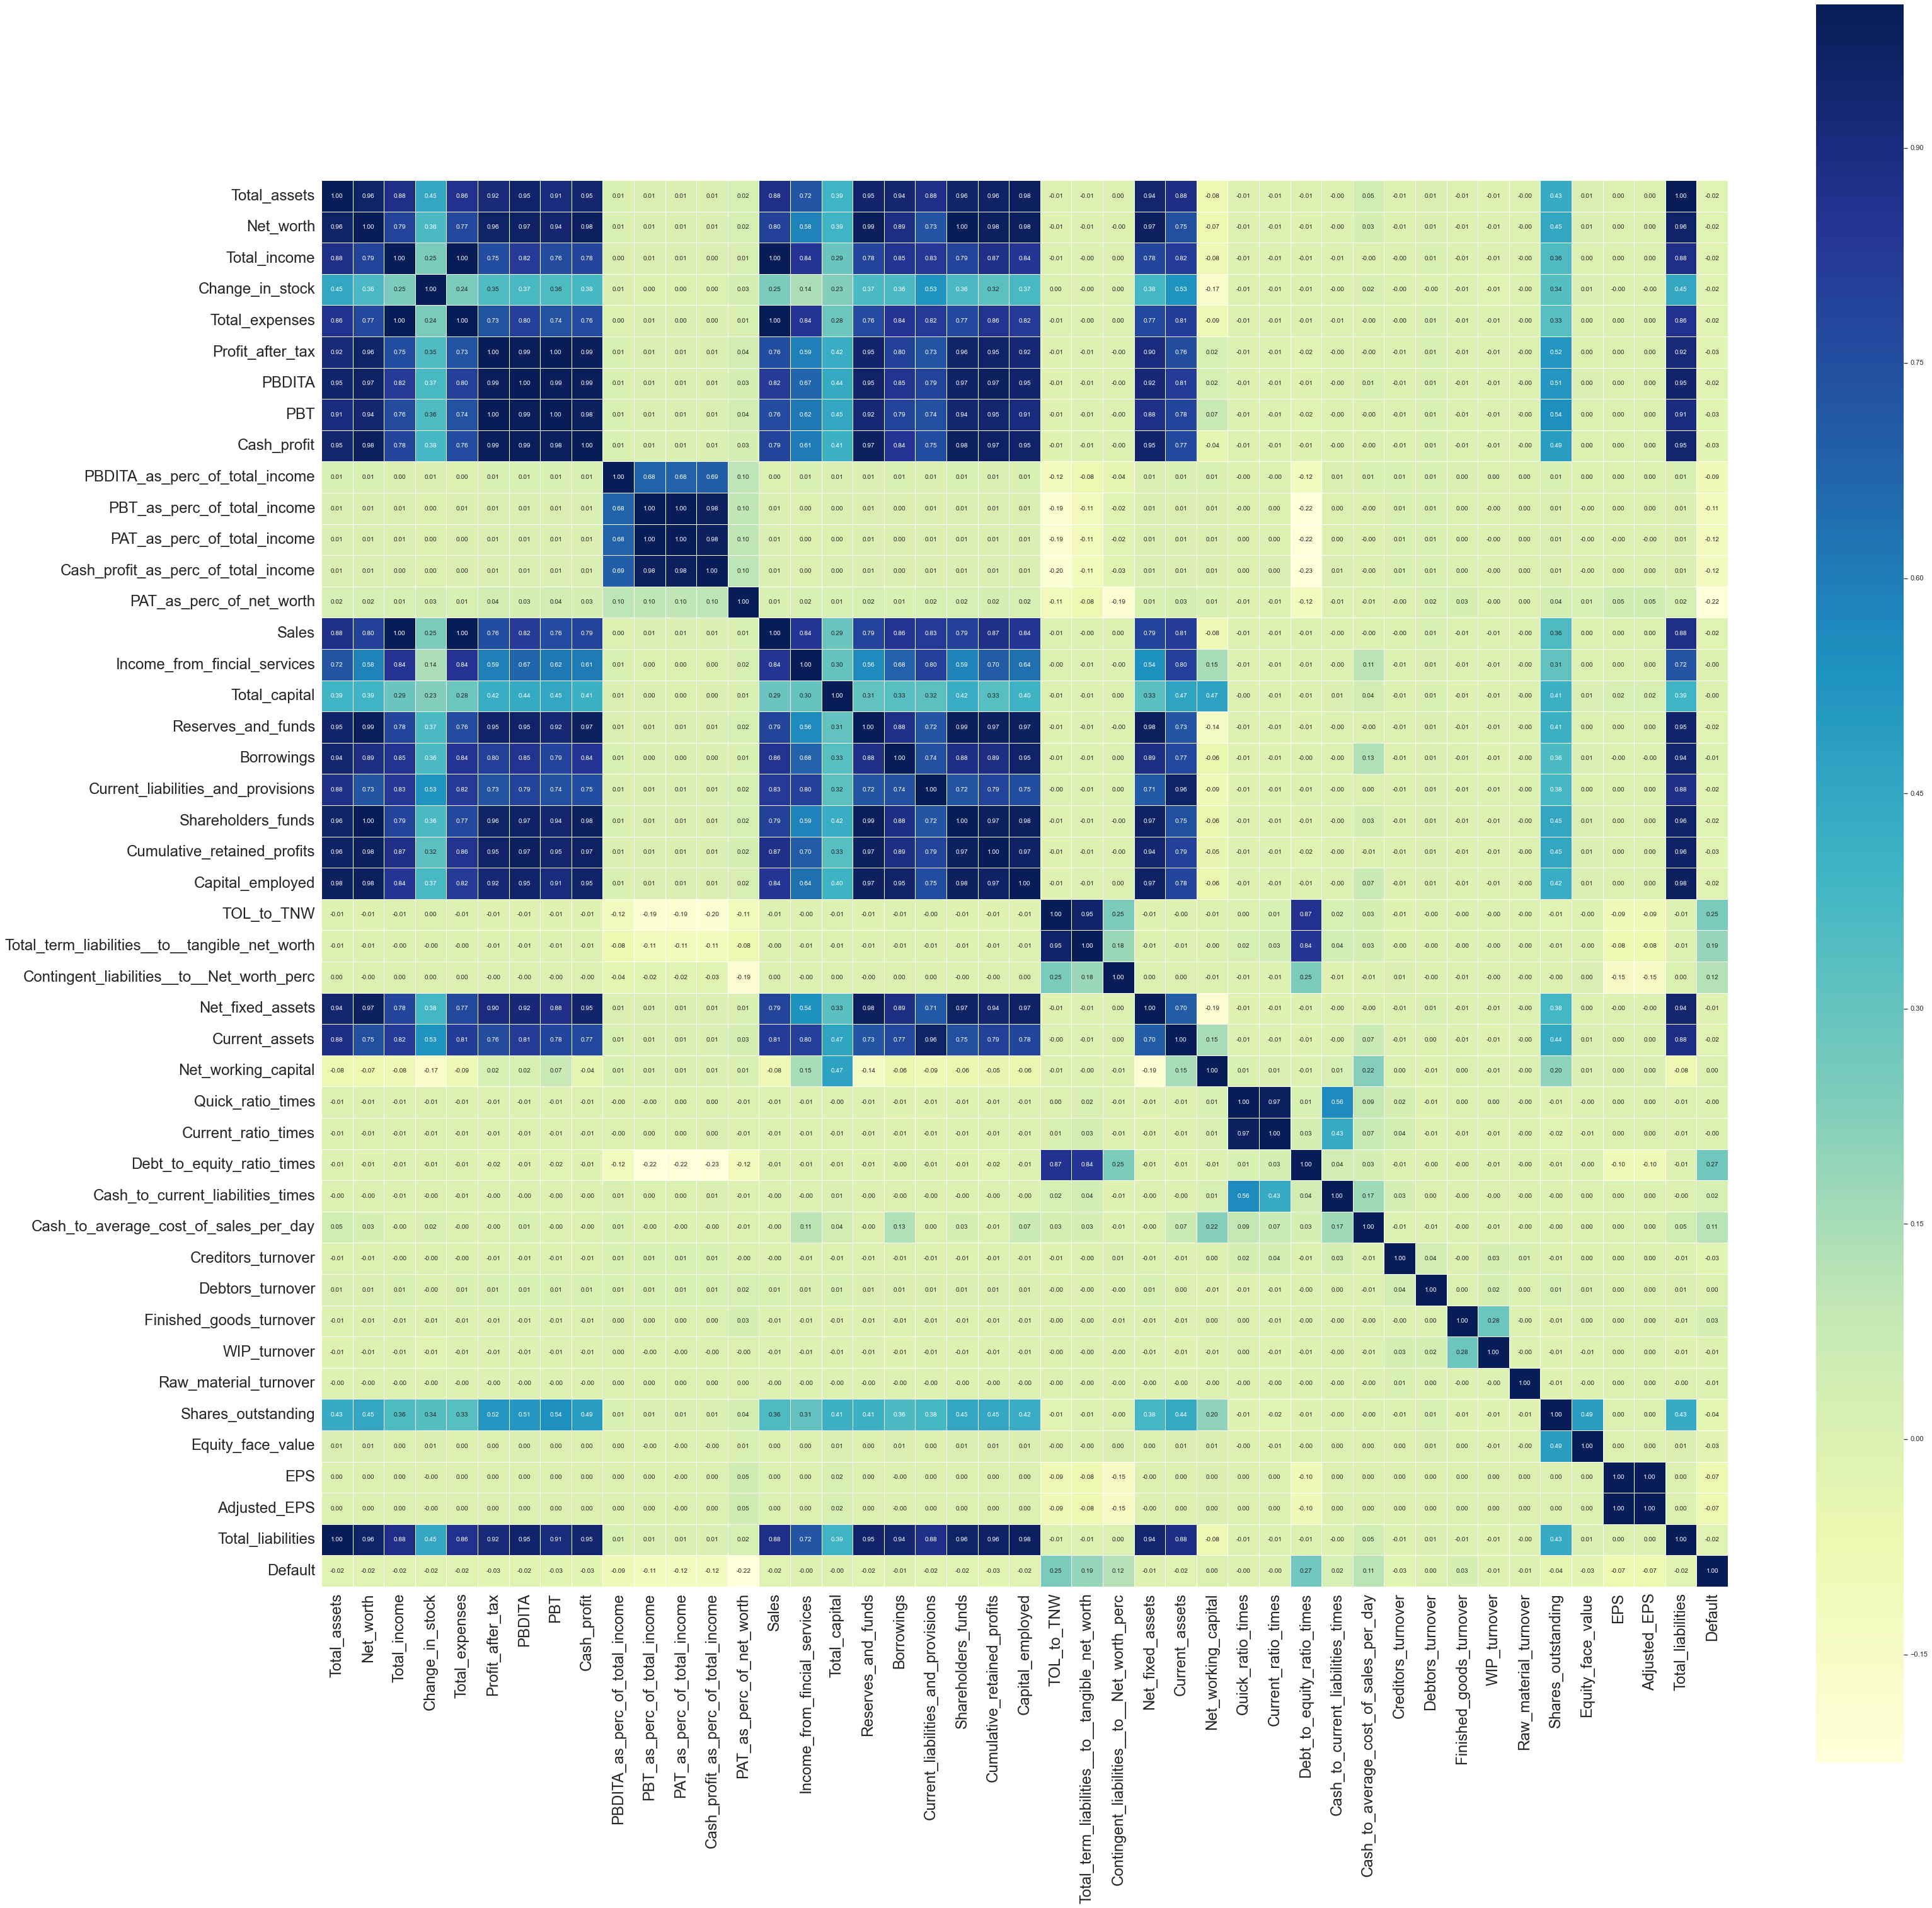

In [39]:
corr=df_1.corr()
plt.figure(figsize=(50,50)) 
sns.heatmap(corr,annot=True,cmap="YlGnBu",linewidth=0.85,square=True,annot_kws={"size":10.10},fmt='.2f')
plt.xticks(fontsize=24)
plt.yticks(size=24)
plt.show()

**Heatmap Insights-**
    
* High correlation is present between the variables, which leads to multi-collinearity.

* Perfect correlation is present between these variables: 

* Total_assets - Networth_Next_Year.
* Net_worth - Networth_Next_Year, Total_assets.
* Total_income - Networth_Next_Year, Total_assets, Net_worth.
* Total_expenses - Networth_Next_Year, Total_assets, Net_worth, Total_income.
* Profit_after_tax - Networth_Next_Year, Total_assets, Net_worth, Total_income,    Total_expenses.
* Total_liabilities - Networth_Next_Year, Total_assets, Net_worth, Total_income, Total_expenses, Profit_after_tax, PBDITA, PBT, Cash_profit, Sales, Other_income, Borrowings, Current_liabilities_and_provisions, Deferred_tax_liability, Shareholders_funds, Cumulative_retained_profits, Capital_employed.

* We'll use VIF as our feature reduction technique to get the most important features for the model.


**Null Values Treatment -** 

As we see above columns which have null % more than 30 % we drop them and continue with the columns which have null % values less 30%. Now , we will impute these null values by using median i.e. as outliers is present in the data so median will be effective choice for null value imputation.


In [40]:
x = df_1.drop('Default', axis = 1)
y = df_1['Default']

In [41]:
print(x.shape)
print(y.shape)

(3591, 44)
(3591,)


In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
x = pd.DataFrame(imputer.fit_transform(x), columns = x.columns)
x

Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  \
0            827.6      336.5         534.1             13.5           508.7   
1             67.7       24.3         137.9             -3.7           131.0   
2            238.4       78.9         331.2            -18.1           309.2   
3           6883.5     1443.3        8448.5            212.2          8482.4   
4             90.9       47.0         388.6              3.4           392.7   
...            ...        ...           ...              ...             ...   
3586         100.4       43.2         273.6              1.3           271.3   
3587        1591.9      375.6        3717.2            -29.7          3681.5   
3588           0.4        0.2         431.4              1.5           398.1   
3589         159.6       86.7         172.9              0.1           169.7   
3590         833.8      664.6        2314.7             32.1          2151.6   

      Profit_after_tax  PBDITA    PBT  Cash_profit  \
0                 38.9   124.4   64.6         95.2   
1                  3.2     5.5    1.0          3.8   
2                  3.9    25.8   10.5          9.4   
3                178.3   418.4  185.1        178.0   
4                 -0.7     7.2   -0.6          3.9   
...                ...     ...    ...          ...   
3586               3.6    13.6    6.0          7.1   
3587               6.0    81.1   13.7          5.7   
3588               8.3    34.4   11.8         18.2   
3589               3.3    18.4    3.7         12.6   
3590             195.2   348.4  303.0        219.5   

      PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  \
0                              23.29                        12.10   
1                               3.99                         0.73   
2                               7.79                         3.17   
3                               4.95                         2.19   
4                               1.85                        -0.15   
...                              ...                          ...   
3586                            4.97                         2.19   
3587                            2.18                         0.37   
3588                            0.00                         0.00   
3589                           10.64                         2.14   
3590                           15.05                        13.09   

      PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  \
0                            7.28                                17.82   
1                            2.32                                 2.76   
2                            1.18                                 2.84   
3                            2.11                                 2.11   
4                           -0.18                                 1.00   
...                           ...                                  ...   
3586                         1.32                                 2.60   
3587                         0.16                                 0.15   
3588                         0.00                                 0.00   
3589                         1.91                                 7.29   
3590                         8.43                                 9.48   

      PAT_as_perc_of_net_worth    Sales  Income_from_fincial_services  \
0                        12.27   533.50                           0.6   
1                         0.00   135.50                           1.8   
2                         5.07   330.60                           0.6   
3                        13.17  8444.20                           2.0   
4                        -1.48   387.60                           0.2   
...                        ...      ...                           ...   
3586                      8.65   272.40                           0.4   
3587                      1.60  3669.80                           9.2   
3588                 

In [43]:
df_1 = pd.concat([x, y], axis = 1)


In [44]:
df_1.isnull().sum()

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liab

**Checking the Shape of the Data-Set -**

In [45]:
df_1.shape

(3591, 45)

In [46]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Total_assets                                    3591 non-null   float64
 1   Net_worth                                       3591 non-null   float64
 2   Total_income                                    3591 non-null   float64
 3   Change_in_stock                                 3591 non-null   float64
 4   Total_expenses                                  3591 non-null   float64
 5   Profit_after_tax                                3591 non-null   float64
 6   PBDITA                                          3591 non-null   float64
 7   PBT                                             3591 non-null   float64
 8   Cash_profit                                     3591 non-null   float64
 9   PBDITA_as_perc_of_total_income           

**Observation -**  Now we don't have any null value present in the dataset which might effect our analysis.

**Checking for Outliers in the dataset -**

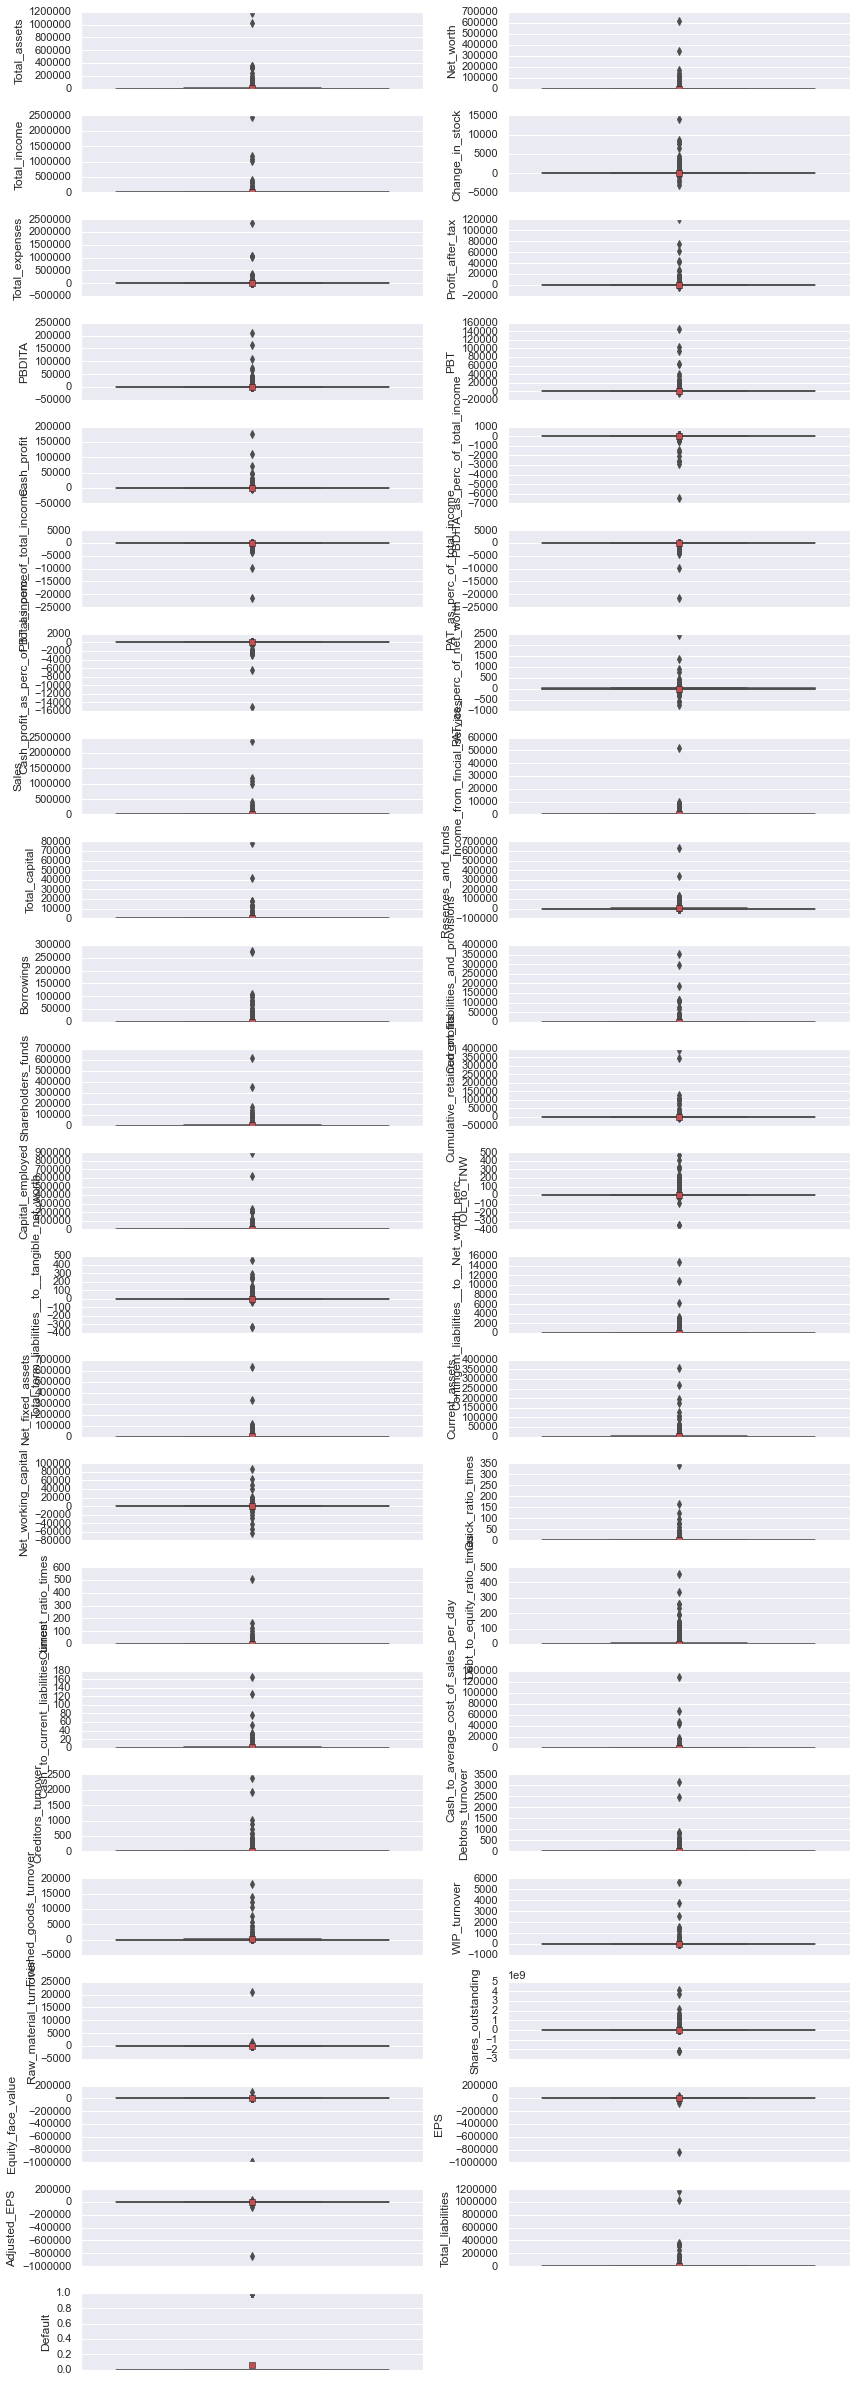

In [47]:
plt.figure(figsize = (12, 36))
for i in range(len(df_1.columns)):
    plt.subplot(25, 2, i + 1)
    sns.boxplot(y = df_1[df_1.columns[i]], data = df_1, showmeans = True)
    plt.tight_layout()

**Observation -**

As we saw all the variables has outliers.Before outlier treatment we split x and y because we don't prefer outlier treatment of the dependent variable.Because it leads to misclassification. That's why we do the outlier treatment on independent variables only.

In [48]:
x = df_1.drop('Default', axis = 1)
y = df_1['Default']

In [49]:
print(x.shape)
print(y.shape)

(3591, 44)
(3591,)


**Treatment of Outliers -**

* As we saw from the above plotted box-plots  all the variables have outliers.

* Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. That's why are doing the outliers treatment.

In [50]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [51]:
for column in x.columns:
    ll, ul = remove_outlier(x[column])
    x[column] = np.where(x[column] > ul, ul, x[column])
    x[column] = np.where(x[column] < ll, ll, x[column])

In [52]:
df_1 = pd.concat([x, y], axis = 1)

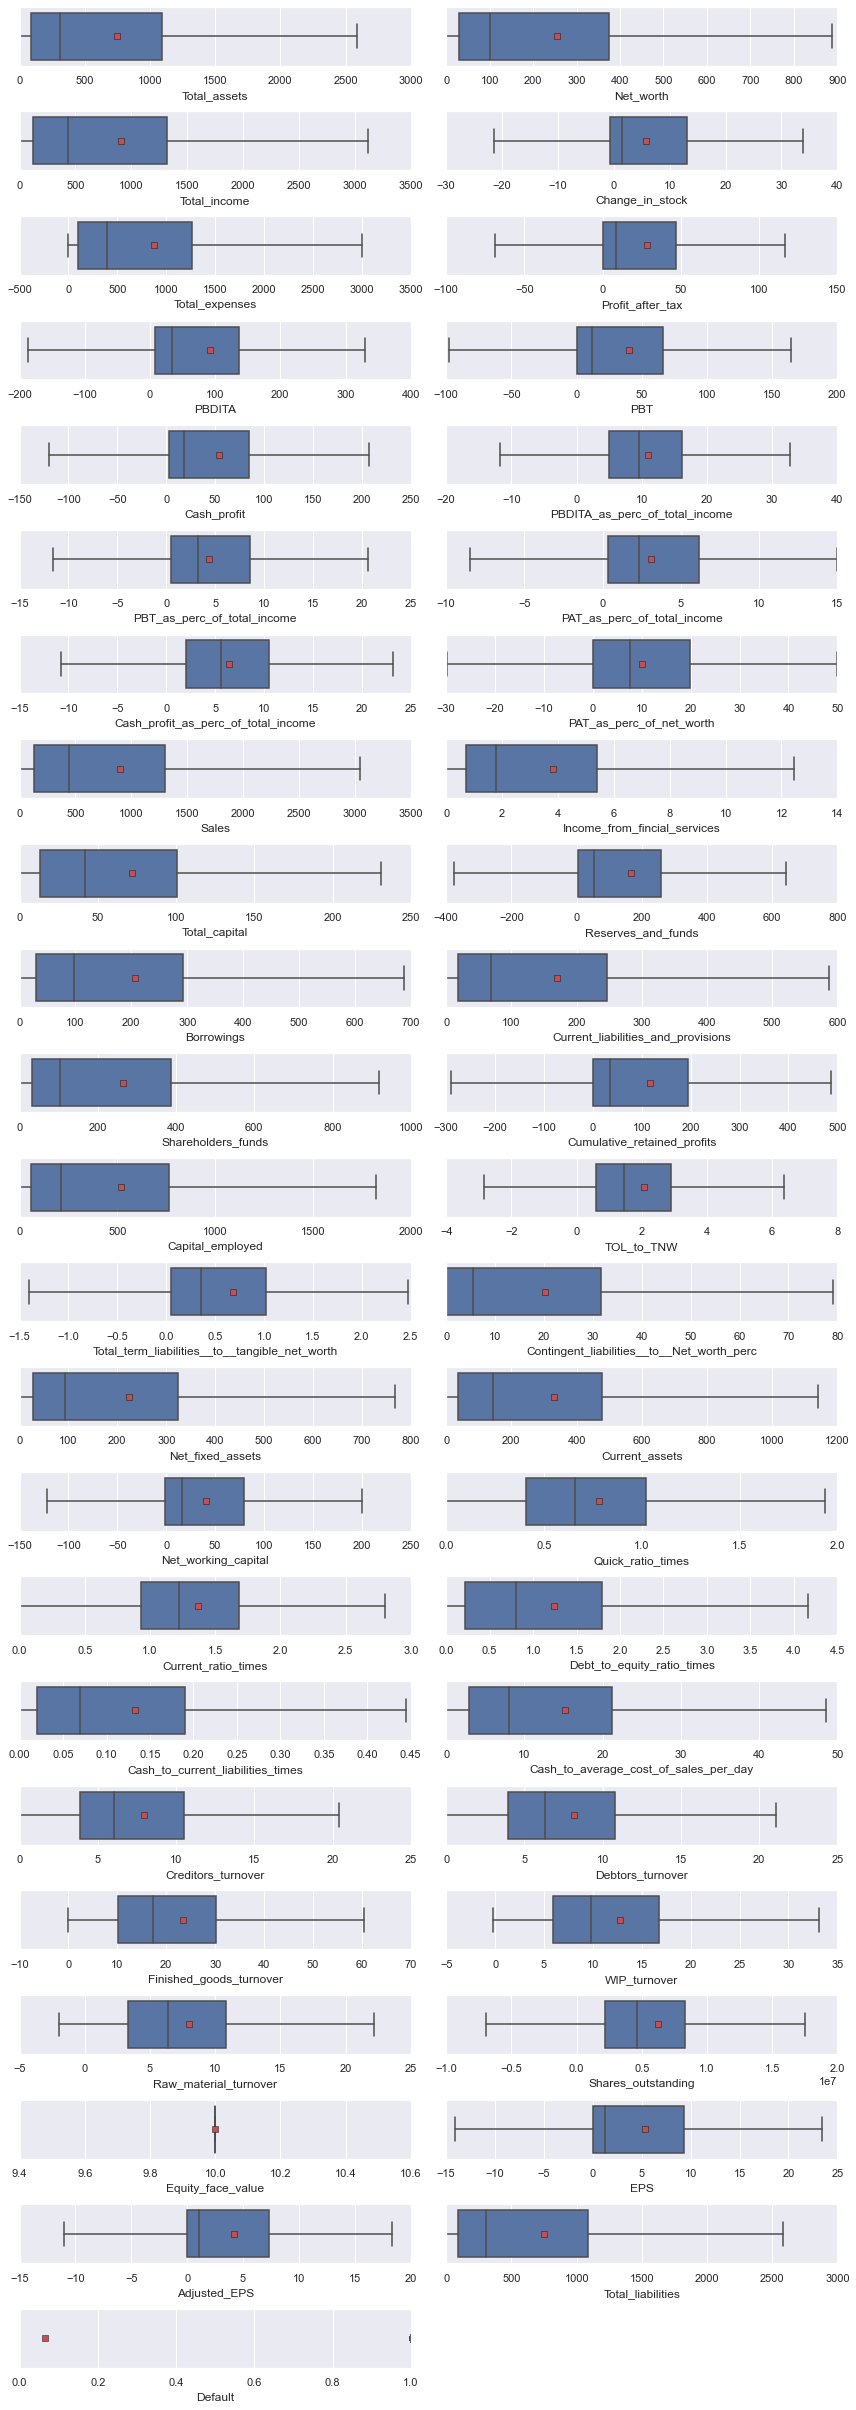

In [53]:
plt.figure(figsize = (12, 36))
for i in range(len(df_1.columns)):
    plt.subplot(25, 2, i + 1)
    sns.boxplot(x = df_1[df_1.columns[i]], data = df_1, showmeans = True)
    plt.tight_layout()

**Results -**

We have successfully treat the outliers , now we don't have any outliers present in the independent variables of the given dataset.

Note - Now our data set is almost  ready for the model building excercise.

**Model Building -**

**Creating Train & Test Datasets**

**Proportion of 1s and 0s -**

In [54]:
df_1["Default"].value_counts(normalize=True).round(3) * 100

0    93.5
1     6.5
Name: Default, dtype: float64

**Extracting the Target column into Separate Vectors for Training Set and Test Set -**

In [55]:
x = df_1.drop('Default', axis = 1)
y = df_1['Default']

**Splitting Data into Training and Test Set -**

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7, stratify = y)

**Shape of Train & Test Dataset -**

In [57]:
print('Shape of x_train : ', str(x_train.shape))
print('Shape of x_test : ', str(x_test.shape))
print('Shape of y_train : ', str(y_train.shape))
print('Shape of y_test : ', str(y_test.shape))

Shape of x_train :  (2513, 44)
Shape of x_test :  (1078, 44)
Shape of y_train :  (2513,)
Shape of y_test :  (1078,)


**Model 1 - Logistic Regression Using Statsmodel library.**

In [58]:
#Statsmodel requires the labelled data, therefore, concatinating the y label to the train set.
Default_train = pd.concat([x_train,y_train], axis=1)
Default_test = pd.concat([x_test,y_test], axis=1)

In [59]:
import statsmodels.formula.api as SM

**Creating our first model using all variables**

In [60]:
    model_1 = SM.logit(formula = 'Default ~ Total_assets+ Net_worth + Total_income + Change_in_stock + Total_expenses + Profit_after_tax + PBDITA + PBT + Cash_profit + PBDITA_as_perc_of_total_income + PBT_as_perc_of_total_income + PAT_as_perc_of_total_income + Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Sales + Income_from_fincial_services + Total_capital + Reserves_and_funds + Borrowings + Current_liabilities_and_provisions + Shareholders_funds  + Cumulative_retained_profits + Capital_employed + TOL_to_TNW + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_fixed_assets + Current_assets + Net_working_capital  + Quick_ratio_times + Current_ratio_times + Debt_to_equity_ratio_times + Cash_to_current_liabilities_times + Cash_to_average_cost_of_sales_per_day  + Creditors_turnover  + Debtors_turnover  + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding  + Equity_face_value  + EPS + Adjusted_EPS + Total_liabilities' , data =Default_train).fit()   

Optimization terminated successfully.
         Current function value: 0.127591
         Iterations 11


**Checking the coefficients -**

In [61]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2513
Model:                          Logit   Df Residuals:                     2468
Method:                           MLE   Df Model:                           44
Date:                Sun, 01 Jan 2023   Pseudo R-squ.:                  0.4687
Time:                        09:23:33   Log-Likelihood:                -320.64
converged:                       True   LL-Null:                       -603.48
Covariance Type:            nonrobust   LLR p-value:                 9.347e-92
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          0.3035   4.31e+06   7.03e-08      1.000   -8.46e+06    8.46e+06
Total_assets                                       0.0013   3.97e+10   3.19e-14      1.000   -7.79e+10    7.79e+10
Net_worth                                         -0.0031      0.003     -1.179      0.238      -0.008       0.002
Total_income                                       0.0009      0.001      1.126      0.260      -0.001       0.003
Change_in_stock                                    0.0223      0.011      1.941      0.052      -0.000       0.045
Total_expenses                                    -0.0005      0.001     -0.498      0.619      -0.002       0.001
Profit_after_tax                                  -0.0030      0.021     -0.144      0.886      -0.044       0.038
PBDITA                                            -0.0005      0.003     -0.176      0.860      -0.006       0.005
PBT                                                0.0113      0.017      0.655      0.512      -0.023       0.045
Cash_profit                                       -0.0157      0.006     -2.511      0.012      -0.028      -0.003
PBDITA_as_perc_of_total_income                    -0.0140      0.017     -0.848      0.397      -0.047       0.018
PBT_as_perc_of_total_income                       -0.0166      0.080     -0.207      0.836      -0.174       0.140
PAT_as_perc_of_total_income                        0.0195      0.105      0.185      0.853      -0.187       0.226
Cash_profit_as_perc_of_total_income               -0.0129      0.028     -0.464      0.642      -0.067       0.042
PAT_as_perc_of_net_worth                          -0.0320      0.009     -3.421      0.001      -0.050      -0.014
Sales                                             -0.0006      0.001     -0.915      0.360      -0.002       0.001
Income_from_fincial_services                      -0.0148      0.056     -0.267      0.790      -0.124       0.094
Total_capital                                     -0.0061      0.004     -1.555      0.120      -0.014       0.002
Reserves_and_funds                                -0.0012      0.001     -0.861      0.389      -0.004       0.001
Borrowings                                         0.0018      0.002      0.876      0.381      -0.002       0.006
Current_liabilities_and_provisions                -0.0015      0.003     -0.540      0.589      -0.007       0.004
Shareholders_funds                                 0.0047      0.003      1.737      0.082      -0.001       0.010
Cumulative_retained_profits                       -0.0086      0.003     -3.172      0.002      -0.014      -0.003
Capital_employed                                  -0.0036      0.002     -1.643      0.100      -0.008       0.001
TOL_to_TNW                                         0.1723      0.090      1.922      0.055      -0.003       0.348
Total_term_liabilitie

**Observation -**

* As we saw most of the variables p value is more than 0.05.As there is some kind of multicollinearity.

**Prediction on the Data -**

In [62]:
y_prob_pred_train = model_1.predict(Default_train)
y_prob_pred_train

2635    7.005195e-05
3162    9.760204e-07
1220    3.502655e-05
851     3.711001e-02
124     2.492910e-02
            ...     
2286    1.290573e-01
1480    3.426787e-04
681     2.739217e-03
1288    3.577219e-04
375     4.058888e-03
Length: 2513, dtype: float64

**Let us now see the predicted classes -**

In [63]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

**Model Evaluation on the Training Data -**

In [64]:
from sklearn import metrics

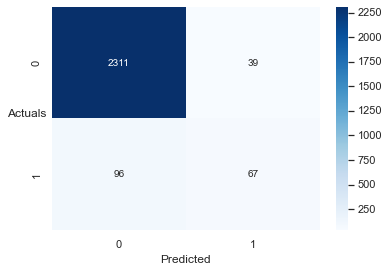

In [65]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

**Classification Report Train Data -**

In [66]:
print(metrics.classification_report(Default_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.960     0.983     0.972      2350
           1      0.632     0.411     0.498       163

    accuracy                          0.946      2513
   macro avg      0.796     0.697     0.735      2513
weighted avg      0.939     0.946     0.941      2513



**Now, let us see the predicted probability values on test dataset**

In [67]:
y_prob_pred_test = model_1.predict(Default_test)
y_prob_pred_test

1573    1.061842e-01
3092    4.414347e-02
3232    6.057812e-03
143     1.102997e-02
3213    1.068022e-06
            ...     
3033    3.460603e-06
1278    7.681759e-02
578     3.599051e-07
3381    3.967431e-03
727     9.093835e-04
Length: 1078, dtype: float64

**Let us now see the predicted classes -**

In [68]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

**Model Evaluation on the Test Data -**

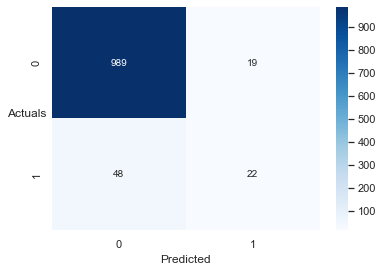

In [69]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

**Classification Report Test Data -**

In [70]:
print(metrics.classification_report(Default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.954     0.981     0.967      1008
           1      0.537     0.314     0.396        70

    accuracy                          0.938      1078
   macro avg      0.745     0.648     0.682      1078
weighted avg      0.927     0.938     0.930      1078



**Feature Selection for Logistics Regression Model 2**

Here we are using VIF to select the feature for our logistic regression model.Features whose VIF is less than 5 will consider for the logistic regression model and then will check the model performance on train and test data.

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif_df = pd.DataFrame()
    vif_df['Variables'] = x.columns
    vif_df['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif_df)

In [72]:
df_vif = vif(x).round(2).sort_values(by = 'VIF', ascending = False)
df_vif

Variables     VIF
0                                     Total_assets     inf
43                               Total_liabilities     inf
2                                     Total_income  220.52
4                                   Total_expenses  169.72
14                                           Sales  138.46
20                              Shareholders_funds  120.90
1                                        Net_worth  109.34
22                                Capital_employed   83.03
7                                              PBT   60.06
5                                 Profit_after_tax   57.55
10                     PBT_as_perc_of_total_income   28.05
6                                           PBDITA   27.12
11                     PAT_as_perc_of_total_income   26.51
8                                      Cash_profit   22.57
40                               Equity_face_value   20.90
27                                  Current_assets   19.81
19              Current_liabilities_and_provisions   14.60
17                              Reserves_and_funds   12.32
41                                             EPS   11.94
42                                    Adjusted_EPS   10.99
21                     Cumulative_retained_profits    8.95
26                                Net_fixed_assets    8.48
12             Cash_profit_as_perc_of_total_income    7.84
18                                      Borrowings    6.59
31                      Debt_to_equity_ratio_times    6.50
9                   PBDITA_as_perc_of_total_income    6.12
16                                   Total_capital    5.65
29                               Quick_ratio_times    5.53
23                                      TOL_to_TNW    5.41
24  Total_term_liabilities__to__tangible_net_worth    5.15
30                             Current_ratio_times    4.67
32               Cash_to_current_liabilities_times    4.46
39                              Shares_outstanding    3.96
33           Cash_to_average_cost_of_sales_per_day    3.45
13                        PAT_as_perc_of_net_worth    2.95
37                                    WIP_turnover    2.62
15                    Income_from_fincial_services    2.52
36                         Finished_goods_turnover    2.36
28                             Net_working_capital    2.16
35                                Debtors_turnover    2.03
34                              Creditors_turnover    1.85
38                           Raw_material_turnover    1.42
3                                  Change_in_stock    1.28
25      Contingent_liabilities__to__Net_worth_perc    1.27

In [73]:
df_vif[df_vif['VIF'] < 5]

Variables   VIF
30                         Current_ratio_times  4.67
32           Cash_to_current_liabilities_times  4.46
39                          Shares_outstanding  3.96
33       Cash_to_average_cost_of_sales_per_day  3.45
13                    PAT_as_perc_of_net_worth  2.95
37                                WIP_turnover  2.62
15                Income_from_fincial_services  2.52
36                     Finished_goods_turnover  2.36
28                         Net_working_capital  2.16
35                            Debtors_turnover  2.03
34                          Creditors_turnover  1.85
38                       Raw_material_turnover  1.42
3                              Change_in_stock  1.28
25  Contingent_liabilities__to__Net_worth_perc  1.27

**Observation -** As the above features have VIF less than 5 , so will going to use these features in our logistics regression model.

In [74]:
x_train_new = x_train[['Current_ratio_times','Cash_to_current_liabilities_times','Shares_outstanding',
                      'Cash_to_average_cost_of_sales_per_day','PAT_as_perc_of_net_worth',
                      'WIP_turnover','Income_from_fincial_services','Finished_goods_turnover',
                      'Net_working_capital','Debtors_turnover','Creditors_turnover','Raw_material_turnover',
                      'Change_in_stock','Contingent_liabilities__to__Net_worth_perc']]

In [75]:
x_test_new = x_test[['Current_ratio_times','Cash_to_current_liabilities_times','Shares_outstanding',
                      'Cash_to_average_cost_of_sales_per_day','PAT_as_perc_of_net_worth',
                      'WIP_turnover','Income_from_fincial_services','Finished_goods_turnover',
                      'Net_working_capital','Debtors_turnover','Creditors_turnover','Raw_material_turnover',
                      'Change_in_stock','Contingent_liabilities__to__Net_worth_perc']]

In [76]:
print('Shape of x_train : ', str(x_train_new.shape))
print('Shape of x_test : ', str(x_test_new.shape))
print('Shape of y_train : ', str(y_train.shape))
print('Shape of y_test : ', str(y_test.shape))

Shape of x_train :  (2513, 14)
Shape of x_test :  (1078, 14)
Shape of y_train :  (2513,)
Shape of y_test :  (1078,)


**Model 2 - Logistics Regression with Selected Features**

In [77]:
train_new = pd.concat([x_train_new, y_train], axis = 1)

In [78]:
test_new = pd.concat([x_test_new, y_test], axis = 1)

In [79]:
import statsmodels.formula.api as SM

In [80]:
model_2 = SM.logit(formula = 'Default ~ Current_ratio_times + Cash_to_current_liabilities_times + Shares_outstanding + Cash_to_average_cost_of_sales_per_day + PAT_as_perc_of_net_worth  + WIP_turnover + Income_from_fincial_services + Finished_goods_turnover + Net_working_capital + Debtors_turnover + Creditors_turnover + Raw_material_turnover + Change_in_stock + Contingent_liabilities__to__Net_worth_perc' ,  data =train_new).fit()        

Optimization terminated successfully.
         Current function value: 0.156607
         Iterations 9


In [81]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2513
Model:                          Logit   Df Residuals:                     2498
Method:                           MLE   Df Model:                           14
Date:                Sun, 01 Jan 2023   Pseudo R-squ.:                  0.3479
Time:                        09:23:36   Log-Likelihood:                -393.55
converged:                       True   LL-Null:                       -603.48
Covariance Type:            nonrobust   LLR p-value:                 8.287e-81
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -1.3303      0.302     -4.412      0.000      -1.921      -0.739
Current_ratio_times                           -0.8426      0.186     -4.534      0.000      -1.207      -0.478
Cash_to_current_liabilities_times              2.3734      1.040      2.281      0.023       0.334       4.412
Shares_outstanding                         -1.873e-08   2.08e-08     -0.901      0.367   -5.95e-08     2.2e-08
Cash_to_average_cost_of_sales_per_day         -0.0043      0.008     -0.562      0.574      -0.019       0.011
PAT_as_perc_of_net_worth                      -0.0884      0.006    -13.841      0.000      -0.101      -0.076
WIP_turnover                                  -0.0078      0.019     -0.406      0.685      -0.046       0.030
Income_from_fincial_services                  -0.1009      0.037     -2.758      0.006      -0.173      -0.029
Finished_goods_turnover                       -0.0017      0.010     -0.179      0.858      -0.021       0.017
Net_working_capital                           -0.0015      0.002     -0.850      0.395      -0.005       0.002
Debtors_turnover                              -0.0104      0.019     -0.533      0.594      -0.049       0.028
Creditors_turnover                            -0.0309      0.024     -1.281      0.200      -0.078       0.016
Raw_material_turnover                         -0.0142      0.019     -0.753      0.451      -0.051       0.023
Change_in_stock                                0.0133      0.008      1.579      0.114      -0.003       0.030
Contingent_liabilities__to__Net_worth_perc     0.0075      0.003      2.235      0.025       0.001       0.014
==============================================================================================================
"""

**Prediction on the Data -**

In [82]:
y_prob_pred_train = model_2.predict(train_new)
y_prob_pred_train

2635    0.548982
3162    0.008262
1220    0.001639
851     0.039554
124     0.022132
          ...   
2286    0.167600
1480    0.003730
681     0.004581
1288    0.005706
375     0.005015
Length: 2513, dtype: float64

**Let us now see the predicted classes -**

In [83]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

**Model Evaluation on the Training Data -**

In [84]:
from sklearn import metrics

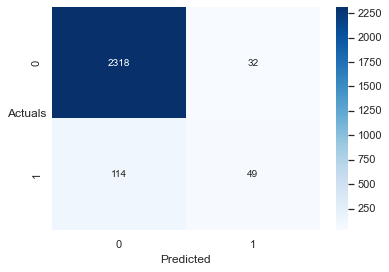

In [85]:
sns.heatmap((metrics.confusion_matrix(train_new['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [86]:
print(metrics.classification_report(train_new['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.953     0.986     0.969      2350
           1      0.605     0.301     0.402       163

    accuracy                          0.942      2513
   macro avg      0.779     0.643     0.686      2513
weighted avg      0.931     0.942     0.933      2513



**Now, let us see the predicted probability values on test dataset**

In [87]:
y_prob_pred_test = model_2.predict(x_test_new)
y_prob_pred_test

1573    0.002952
3092    0.070903
3232    0.007622
143     0.072095
3213    0.021115
          ...   
3033    0.007354
1278    0.069981
578     0.000895
3381    0.007900
727     0.002757
Length: 1078, dtype: float64

**Let us now see the predicted classes -**

In [88]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

**Model Evaluation on the Test Data -**

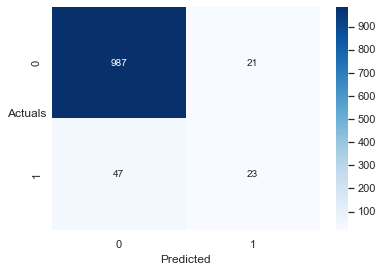

In [89]:
sns.heatmap((metrics.confusion_matrix(test_new['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

**Classification Report Test Data -**

In [90]:
print(metrics.classification_report(test_new['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.955     0.979     0.967      1008
           1      0.523     0.329     0.404        70

    accuracy                          0.937      1078
   macro avg      0.739     0.654     0.685      1078
weighted avg      0.927     0.937     0.930      1078



**Necessary Libraries--**

In [91]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix

**Model 3 -  Random Forest Base Model**

**Extracting the target column into separate vectors for training set and test set.**

In [92]:
X = df_1.drop("Default", axis=1)

y = df_1.pop("Default")

**Splitting data into training and test set.**

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels,test_labels = train_test_split(X, y, test_size=.30, random_state=1,stratify = y)

**Checking the dimensions of the training and test data.**

In [94]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2513, 44)
X_test (1078, 44)
train_labels (2513,)
test_labels (1078,)


In [95]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier()
rfcl = rfcl.fit(X_train, train_labels)
rfcl

RandomForestClassifier()

**Variable Importance**

In [96]:
print(
    pd.DataFrame(rfcl.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))


                                                     Imp
Cash_profit                                     0.055235
TOL_to_TNW                                      0.051711
Debt_to_equity_ratio_times                      0.051147
Net_worth                                       0.050217
Shareholders_funds                              0.048794
PAT_as_perc_of_net_worth                        0.044168
PBT                                             0.043074
PBT_as_perc_of_total_income                     0.037838
Reserves_and_funds                              0.032624
Profit_after_tax                                0.031376
Cash_profit_as_perc_of_total_income             0.028587
PAT_as_perc_of_total_income                     0.027111
Capital_employed                                0.026009
Cumulative_retained_profits                     0.023213
Current_ratio_times                             0.023116
Total_term_liabilities__to__tangible_net_worth  0.023001
PBDITA                         

**Predicting on Training and Test dataset**

In [97]:
rf_ytrain_predict = rfcl.predict(X_train)
rf_ytest_predict = rfcl.predict(X_test)

In [98]:
rf_ytrain_predict

array([0, 0, 1, ..., 0, 0, 0])

In [99]:
rf_ytest_predict

array([0, 0, 0, ..., 0, 0, 0])

**Getting the Predicted Probability**

In [100]:
rf_ytrain_predict_prob=rfcl.predict_proba(X_train)
rf_ytrain_predict_prob
pd.DataFrame(rf_ytrain_predict_prob).head()

0      1
0  0.990  0.010
1  1.000  0.000
2  0.125  0.875
3  0.940  0.060
4  0.980  0.020

In [101]:
rf_ytest_predict_prob=rfcl.predict_proba(X_test)
rf_ytest_predict_prob
pd.DataFrame(rf_ytest_predict_prob).head()

0     1
0  1.00  0.00
1  1.00  0.00
2  0.99  0.01
3  0.99  0.01
4  1.00  0.00

**Model Evaluation - Random Forest Base Model**

**AUC and ROC for the Training Data**

AUC: 0.999


Text(0, 0.5, 'True Positive Rate')

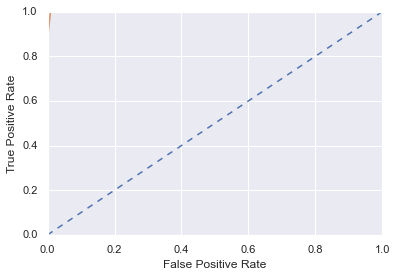

In [102]:
# predict probabilities
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
rf_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [103]:
rf_confusion_matrix_train=confusion_matrix(train_labels, rf_ytrain_predict)
rf_confusion_matrix_train

array([[2340,   10],
       [  10,  153]], dtype=int64)

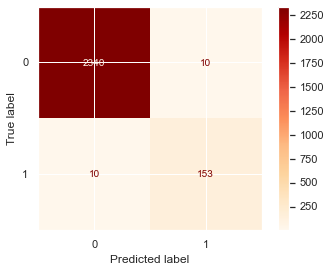

In [104]:
plot_confusion_matrix(rfcl,X_train,train_labels,colorbar=True,cmap='OrRd')

**Train Data Accuracy**

In [105]:
rf_train_acc=rfcl.score(X_train,train_labels)
rf_train_acc

0.9920413847990449

**Classification Report of Training Data**

In [106]:
print(classification_report(train_labels, rf_ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2350
           1       0.94      0.94      0.94       163

    accuracy                           0.99      2513
   macro avg       0.97      0.97      0.97      2513
weighted avg       0.99      0.99      0.99      2513



**Train Data - Precision,Recall & f1 score of class 0**

In [107]:
rf_metrics=classification_report(train_labels, rf_ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_f1=round(df.loc["0"][2],2)
rf_train_recall=round(df.loc["0"][1],2)
rf_train_precision=round(df.loc["0"][0],2)
print ('rf_train_precision',rf_train_precision)
print ('rf_train_recall',rf_train_recall)
print ('rf_train_f1',rf_train_f1)

rf_train_precision 1.0
rf_train_recall 1.0
rf_train_f1 1.0


**Train Data - Precision,Recall & f1 score of class 1**

In [108]:
rf_metrics=classification_report(train_labels, rf_ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_f1=round(df.loc["1"][2],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_precision=round(df.loc["1"][0],2)
print ('rf_train_precision',rf_train_precision)
print ('rf_train_recall',rf_train_recall)
print ('rf_train_f1',rf_train_f1)

rf_train_precision 0.94
rf_train_recall 0.94
rf_train_f1 0.94


**AUC and ROC for the Test Data**

AUC: 0.882


Text(0, 0.5, 'True Positive Rate')

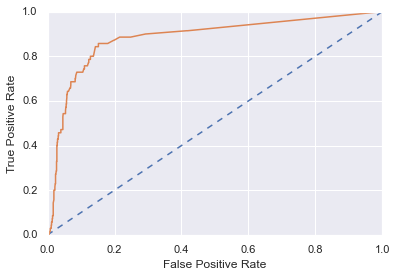

In [109]:
# predict probabilities
probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# calculate AUC
rf_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for Test Data**

In [110]:
rf_confusion_matrix_test=confusion_matrix(test_labels, rf_ytest_predict)
rf_confusion_matrix_test

array([[980,  28],
       [ 42,  28]], dtype=int64)

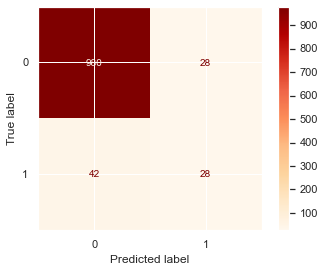

In [111]:
plot_confusion_matrix(rfcl,X_test,test_labels,colorbar=True,cmap='OrRd')

**Test Data Accuracy**

In [112]:
rf_test_acc=rfcl.score(X_test,test_labels)
rf_test_acc

0.935064935064935

**Classification Report of Test Data**

In [113]:
print(classification_report(test_labels, rf_ytest_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1008
           1       0.50      0.40      0.44        70

    accuracy                           0.94      1078
   macro avg       0.73      0.69      0.70      1078
weighted avg       0.93      0.94      0.93      1078



**Test Data - Precision,Recall & f1 score of class 0**

In [114]:
rf_metrics=classification_report(test_labels, rf_ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_f1=round(df.loc["0"][2],2)
rf_test_recall=round(df.loc["0"][1],2)
rf_test_precision=round(df.loc["0"][0],2)
print ('rf_test_precision',rf_test_precision)
print ('rf_test_recall',rf_test_recall)
print ('rf_test_f1',rf_test_f1)

rf_test_precision 0.96
rf_test_recall 0.97
rf_test_f1 0.97


**Test Data - Precision,Recall & f1 score of class 1**

In [115]:
rf_metrics=classification_report(test_labels, rf_ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_f1=round(df.loc["1"][2],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_precision=round(df.loc["1"][0],2)
print ('rf_test_precision',rf_test_precision)
print ('rf_test_recall',rf_test_recall)
print ('rf_test_f1',rf_test_f1)

rf_test_precision 0.5
rf_test_recall 0.4
rf_test_f1 0.44


**Result -** There is problem of over-fitting in this model , we may try bagging (ensemble technique) on this model and check its performance.

**Model - 4 Bagging of Random Forest**

In [116]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rf_bag = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rf_bag,n_estimators=100,random_state=1)
Bagging_model.fit(X_train,train_labels)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

**Predicting the Training and Testing data**

In [117]:
rf_bag_ytrain_predict = Bagging_model.predict(X_train)
rf_bag_ytest_predict = Bagging_model.predict(X_test)


In [118]:
rf_bag_ytrain_predict

array([0, 0, 1, ..., 0, 0, 0])

In [119]:
rf_bag_ytest_predict

array([0, 0, 0, ..., 0, 0, 0])

**Getting the Predicted Probability**

In [120]:
rf_bag_ytrain_predict
rf_bag_ytrain_predict_prob=Bagging_model.predict_proba(X_train)
rf_bag_ytrain_predict_prob
pd.DataFrame(rf_bag_ytrain_predict_prob).head()

0         1
0  0.999500  0.000500
1  0.999300  0.000700
2  0.232319  0.767681
3  0.936767  0.063233
4  0.921368  0.078632

In [121]:
rf_bag_ytest_predict
rf_bag_ytest_predict_prob=Bagging_model.predict_proba(X_test)
rf_bag_ytest_predict_prob
pd.DataFrame(rf_bag_ytest_predict_prob).head()

0         1
0  0.990517  0.009483
1  0.999341  0.000659
2  0.997236  0.002764
3  0.995100  0.004900
4  0.999500  0.000500

**Model Evaluation - Bagging of Random Forest**

**AUC and ROC for the Training Data**

AUC: 0.998


Text(0, 0.5, 'True Positive Rate')

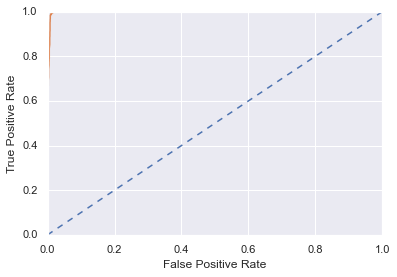

In [122]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_bag_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % rf_bag_train_auc)
# calculate roc curve
rf_bag_train_fpr, rf_bag_train_tpr, rf_bag_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_bag_train_fpr, rf_bag_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [123]:
rf_bag_confusion_matrix_train=confusion_matrix(train_labels, rf_bag_ytrain_predict)
rf_bag_confusion_matrix_train

array([[2338,   12],
       [  27,  136]], dtype=int64)

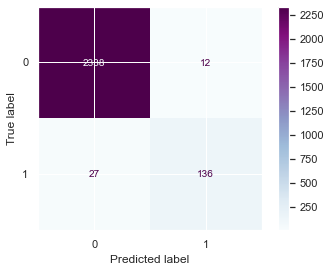

In [124]:
plot_confusion_matrix(Bagging_model,X_train,train_labels,colorbar=True,cmap='BuPu')

**Train Data Accuracy**

In [125]:
rf_bag_train_acc=Bagging_model.score(X_train,train_labels)
rf_bag_train_acc

0.9844807003581377

**Classification Report of Train Data**

In [126]:
print(classification_report(train_labels, rf_bag_ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2350
           1       0.92      0.83      0.87       163

    accuracy                           0.98      2513
   macro avg       0.95      0.91      0.93      2513
weighted avg       0.98      0.98      0.98      2513



**Train Data - Precision,Recall & f1 score of class 0**

In [127]:
rf_bag_metrics=classification_report(train_labels, rf_bag_ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_bag_metrics).transpose()
rf_bag_train_f1=round(df.loc["0"][2],2)
rf_bag_train_recall=round(df.loc["0"][1],2)
rf_bag_train_precision=round(df.loc["0"][0],2)
print ('rf_bag_train_precision',rf_bag_train_precision)
print ('rf_bag_train_recall',rf_bag_train_recall)
print ('rf_bag_train_f1',rf_bag_train_f1)


rf_bag_train_precision 0.99
rf_bag_train_recall 0.99
rf_bag_train_f1 0.99


**Train Data - Precision,Recall & f1 score of class 1**

In [128]:
rf_bag_metrics=classification_report(train_labels, rf_bag_ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_bag_metrics).transpose()
rf_bag_train_f1=round(df.loc["1"][2],2)
rf_bag_train_recall=round(df.loc["1"][1],2)
rf_bag_train_precision=round(df.loc["1"][0],2)
print ('rf_bag_train_precision',rf_bag_train_precision)
print ('rf_bag_train_recall',rf_bag_train_recall)
print ('rf_bag_train_f1',rf_bag_train_f1)

rf_bag_train_precision 0.92
rf_bag_train_recall 0.83
rf_bag_train_f1 0.87


**AUC and ROC for the Test Data**

AUC: 0.902


Text(0, 0.5, 'True Positive Rate')

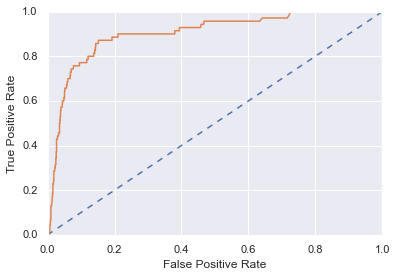

In [129]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# calculate AUC
rf_bag_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % rf_bag_test_auc)
# calculate roc curve
rf_bag_test_fpr, rf_bag_test_tpr, rf_bag_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_bag_test_fpr, rf_bag_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for Test Data**

In [130]:
rf_bag_confusion_matrix_test=confusion_matrix(test_labels, rf_bag_ytest_predict)
rf_bag_confusion_matrix_test

array([[984,  24],
       [ 48,  22]], dtype=int64)

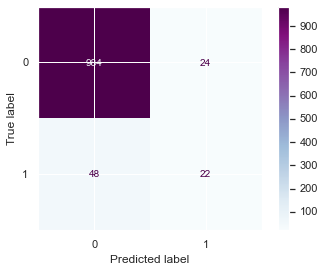

In [131]:
plot_confusion_matrix(Bagging_model,X_test,test_labels,colorbar=True,cmap='BuPu')

**Test Data Accuracy**

In [132]:
rf_bag_test_acc=Bagging_model.score(X_test,test_labels)
rf_bag_test_acc

0.9332096474953617

**Classification Report of Test Data**

In [133]:
print(classification_report(test_labels, rf_bag_ytest_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1008
           1       0.48      0.31      0.38        70

    accuracy                           0.93      1078
   macro avg       0.72      0.65      0.67      1078
weighted avg       0.92      0.93      0.93      1078



**Test Data - Precision,Recall & f1 score of class 0**

In [134]:
rf_bag_metrics=classification_report(test_labels, rf_bag_ytest_predict,output_dict=True)
df=pd.DataFrame(rf_bag_metrics).transpose()
rf_bag_test_f1=round(df.loc["0"][2],2)
rf_bag_test_recall=round(df.loc["0"][1],2)
rf_bag_test_precision=round(df.loc["0"][0],2)
print ('rf_bag_test_precision',rf_bag_test_precision)
print ('rf_bag_test_recall',rf_bag_test_recall)
print ('rf_bag_test_f1',rf_bag_test_f1)

rf_bag_test_precision 0.95
rf_bag_test_recall 0.98
rf_bag_test_f1 0.96


**Test Data - Precision,Recall & f1 score of class 1**

In [135]:
rf_bag_metrics=classification_report(test_labels, rf_bag_ytest_predict,output_dict=True)
df=pd.DataFrame(rf_bag_metrics).transpose()
rf_bag_test_f1=round(df.loc["1"][2],2)
rf_bag_test_recall=round(df.loc["1"][1],2)
rf_bag_test_precision=round(df.loc["1"][0],2)
print ('rf_bag_test_precision',rf_bag_test_precision)
print ('rf_bag_test_recall',rf_bag_test_recall)
print ('rf_bag_test_f1',rf_bag_test_f1)


rf_bag_test_precision 0.48
rf_bag_test_recall 0.31
rf_bag_test_f1 0.38


**Model 5 Logistics Regression with sklearn.**

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
model = LogisticRegression()
model.fit(X_train, train_labels)

LogisticRegression()

**Predicting on Training and Test dataset.**

In [138]:
lr_ytrain_predict =model.predict(X_train)
lr_ytest_predict = model.predict(X_test)

In [139]:
lr_ytrain_predict

array([0, 0, 0, ..., 0, 0, 0])

In [140]:
lr_ytest_predict

array([0, 0, 0, ..., 0, 0, 0])

**Getting the Predicted Probability For Train & Test Data.**

In [141]:
lr_ytrain_predict_prob=model.predict_proba(X_train)
lr_ytrain_predict_prob
pd.DataFrame(lr_ytrain_predict_prob).head()

0         1
0  0.986601  0.013399
1  0.999998  0.000002
2  0.910885  0.089115
3  0.999994  0.000006
4  0.999769  0.000231

In [142]:
lr_ytest_predict_prob=model.predict_proba(X_test)
lr_ytest_predict_prob
pd.DataFrame(lr_ytest_predict_prob).head()

0         1
0  0.756623  0.243377
1  0.998915  0.001085
2  0.837883  0.162117
3  0.638727  0.361273
4  0.827063  0.172937

**Model Evaluation-Logistic Regression**

**AUC and ROC for the Training Data.**

AUC: 0.704


Text(0, 0.5, 'True Positive Rate')

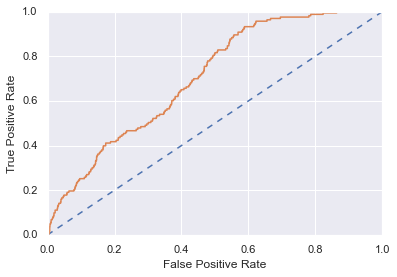

In [143]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data.**

In [144]:
lr_confusion_matrix_train=confusion_matrix(train_labels, lr_ytrain_predict)
lr_confusion_matrix_train

array([[2322,   28],
       [ 152,   11]], dtype=int64)

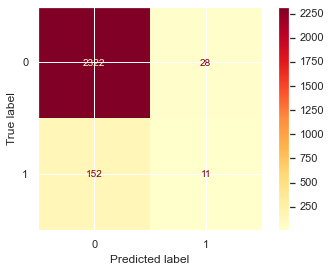

In [145]:
plot_confusion_matrix(model,X_train,train_labels,colorbar=True,cmap='YlOrRd')

**Train Data Accuracy.**

In [146]:
lr_train_acc=model.score(X_train,train_labels)
lr_train_acc

0.9283724631914047

**Classification Report of Training Data.**

In [147]:
print(classification_report(train_labels, lr_ytrain_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2350
           1       0.28      0.07      0.11       163

    accuracy                           0.93      2513
   macro avg       0.61      0.53      0.54      2513
weighted avg       0.90      0.93      0.91      2513



**Train Data - Precision,Recall & f1 score of class 0.**

In [148]:
lr_metrics=classification_report(train_labels, lr_ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["0"][2],2)
lr_train_recall=round(df.loc["0"][1],2)
lr_train_precision=round(df.loc["0"][0],2)
print ('lr_train_precision',lr_train_precision)
print ('lr_train_recall',lr_train_recall)
print ('lr_train_f1',lr_train_f1)

lr_train_precision 0.94
lr_train_recall 0.99
lr_train_f1 0.96


**Train Data - Precision,Recall & f1 score of class 1.**

In [149]:
lr_metrics=classification_report(train_labels, lr_ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.28
lr_train_recall  0.07
lr_train_f1  0.11


**AUC and ROC for the Test Data.**

AUC: 0.738


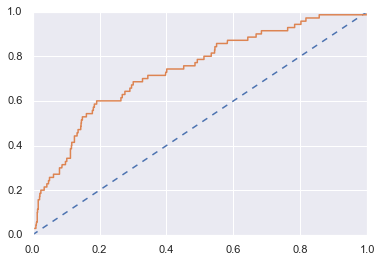

In [150]:
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)

**Confusion Matrix for Test Data.**

In [151]:
lr_confusion_matrix_test=confusion_matrix(test_labels, lr_ytest_predict)
lr_confusion_matrix_test

array([[993,  15],
       [ 62,   8]], dtype=int64)

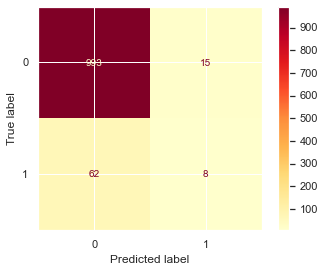

In [152]:
plot_confusion_matrix(model,X_test,test_labels,colorbar=True,cmap='YlOrRd')

**Test Data Accuracy**

In [153]:
lr_test_acc=model.score(X_test,test_labels)
lr_test_acc

0.9285714285714286

**Classification Report of Test Data.**

In [154]:
print(classification_report(test_labels, lr_ytest_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1008
           1       0.35      0.11      0.17        70

    accuracy                           0.93      1078
   macro avg       0.64      0.55      0.57      1078
weighted avg       0.90      0.93      0.91      1078



**Test Data - Precision,Recall & f1 score of class 0.**

In [155]:
lr_metrics=classification_report(test_labels, lr_ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_precision=round(df.loc["0"][0],2)
lr_test_recall=round(df.loc["0"][1],2)
lr_test_f1=round(df.loc["0"][2],2)
print ('lr_test_precision',lr_test_precision)
print ('lr_test_recall',lr_test_recall)
print ('lr_test_f1',lr_test_f1)

lr_test_precision 0.94
lr_test_recall 0.99
lr_test_f1 0.96


**Test Data - Precision,Recall & f1 score of class 1.**

In [156]:
lr_metrics=classification_report(test_labels, lr_ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.35
lr_test_recall  0.11
lr_test_f1  0.17


**Conclusion Logistic Regression Model :**  Accuracy is okay , but recall and precision for class 1 is not good as wanted.

**Model 6 - Gradient Boosting Model**

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train,train_labels)

**Predicting the Training and Testing data**

In [158]:
gbcl_ytrain_predict = gbcl.predict(X_train)
gbcl_ytest_predict = gbcl.predict(X_test)

In [159]:
gbcl_ytrain_predict

array([0, 0, 1, ..., 0, 0, 0])

In [160]:
gbcl_ytest_predict

array([0, 0, 0, ..., 0, 0, 0])

**Getting the Predicted Probability**

In [161]:
gbcl_ytrain_predict
gbcl_ytrain_predict_prob=gbcl.predict_proba(X_train)
gbcl_ytrain_predict_prob
pd.DataFrame(gbcl_ytrain_predict_prob).head()

0         1
0  0.996742  0.003258
1  0.995473  0.004527
2  0.085649  0.914351
3  0.988301  0.011699
4  0.977060  0.022940

In [162]:
gbcl_ytest_predict
gbcl_ytest_predict_prob=gbcl.predict_proba(X_test)
gbcl_ytest_predict_prob
pd.DataFrame(gbcl_ytest_predict_prob).head()

0         1
0  0.990648  0.009352
1  0.997043  0.002957
2  0.993749  0.006251
3  0.996558  0.003442
4  0.996742  0.003258

**Model Evaluation - Gradient Boosting Model**

**AUC and ROC for the Training Data**

AUC: 0.991


Text(0, 0.5, 'True Positive Rate')

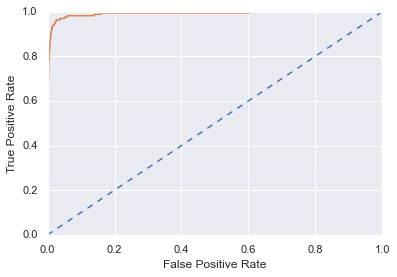

In [163]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [164]:
gbcl_confusion_matrix_train=confusion_matrix(train_labels, gbcl_ytrain_predict)
gbcl_confusion_matrix_train

array([[2334,   16],
       [  24,  139]], dtype=int64)

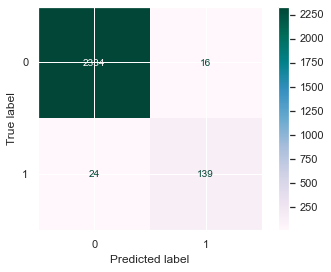

In [165]:
plot_confusion_matrix(gbcl,X_train,train_labels,colorbar=True,cmap='PuBuGn')

**Train Data Accuracy**

In [166]:
gbcl_train_acc=gbcl.score(X_train,train_labels)
gbcl_train_acc


0.9840827695980899

**Classification Report of Train Data**

In [167]:
print(classification_report(train_labels, gbcl_ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2350
           1       0.90      0.85      0.87       163

    accuracy                           0.98      2513
   macro avg       0.94      0.92      0.93      2513
weighted avg       0.98      0.98      0.98      2513



**Train Data - Precision,Recall & f1 score of class 0**

In [168]:
gbcl_metrics=classification_report(train_labels, gbcl_ytrain_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_f1=round(df.loc["0"][2],2)
gbcl_train_recall=round(df.loc["0"][1],2)
gbcl_train_precision=round(df.loc["0"][0],2)
print ('gbcl_train_precision',gbcl_train_precision)
print ('gbcl_train_recall',gbcl_train_recall)
print ('gbcl_train_f1',gbcl_train_f1)


gbcl_train_precision 0.99
gbcl_train_recall 0.99
gbcl_train_f1 0.99


**Train Data - Precision,Recall & f1 score of class 1**

In [169]:
gbcl_metrics=classification_report(train_labels, gbcl_ytrain_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_f1=round(df.loc["1"][2],2)
gbcl_train_recall=round(df.loc["1"][1],2)
gbcl_train_precision=round(df.loc["1"][0],2)
print ('gbcl_train_precision',gbcl_train_precision)
print ('gbcl_train_recall',gbcl_train_recall)
print ('gbcl_train_f1',gbcl_train_f1)

gbcl_train_precision 0.9
gbcl_train_recall 0.85
gbcl_train_f1 0.87


**AUC and ROC for the Test Data**

AUC: 0.904


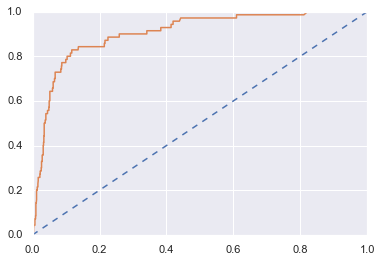

In [170]:
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr)


**Confusion Matrix for Test Data**

In [171]:
gbcl_confusion_matrix_test=confusion_matrix(test_labels, gbcl_ytest_predict)
gbcl_confusion_matrix_test

array([[976,  32],
       [ 44,  26]], dtype=int64)

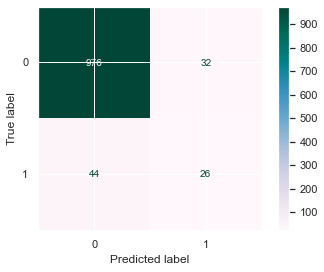

In [172]:
plot_confusion_matrix(gbcl,X_test,test_labels,colorbar=True,cmap='PuBuGn')

**Test Data Accuracy**

In [173]:
gbcl_test_acc=gbcl.score(X_test,test_labels)
gbcl_test_acc

0.9294990723562152

**Classification Report of Test Data**

In [174]:
print(classification_report(test_labels, gbcl_ytest_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1008
           1       0.45      0.37      0.41        70

    accuracy                           0.93      1078
   macro avg       0.70      0.67      0.68      1078
weighted avg       0.92      0.93      0.93      1078



**Test Data - Precision,Recall & f1 score of class 0**

In [175]:
gbcl_metrics=classification_report(test_labels, gbcl_ytest_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_f1=round(df.loc["0"][2],2)
gbcl_test_recall=round(df.loc["0"][1],2)
gbcl_test_precision=round(df.loc["0"][0],2)
print ('gbcl_test_precision',gbcl_test_precision)
print ('gbcl_test_recall',gbcl_test_recall)
print ('gbcl_test_f1',gbcl_test_f1)

gbcl_test_precision 0.96
gbcl_test_recall 0.97
gbcl_test_f1 0.96


**Test Data - Precision,Recall & f1 score of class 1**

In [176]:
bcl_metrics=classification_report(test_labels, gbcl_ytest_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_f1=round(df.loc["1"][2],2)
gbcl_test_recall=round(df.loc["1"][1],2)
gbcl_test_precision=round(df.loc["1"][0],2)
print ('gbcl_test_precision',gbcl_test_precision)
print ('gbcl_test_recall',gbcl_test_recall)
print ('gbcl_test_f1',gbcl_test_f1)

gbcl_test_precision 0.45
gbcl_test_recall 0.37
gbcl_test_f1 0.41


**SMOTE**

In [177]:
from imblearn.over_sampling import SMOTE

In [178]:
#SMOTE is only applied on the train data set
sm = SMOTE(random_state=2)
X_train_res,train_labels_res = sm.fit_resample(X_train, train_labels.ravel())

In [179]:
## Let's check the shape after SMOTE
X_train_res.shape

(4700, 44)

**Model 7 - Logistic Regression Model with SMOTE**

In [180]:
model = LogisticRegression()
model.fit(X_train_res, train_labels_res)

LogisticRegression()

**Predicting on Training and Test dataset.**

In [181]:
sm_lr_ytrain_predict_ =model.predict(X_train_res)
sm_lr_ytest_predict = model.predict(X_test)

In [182]:
sm_lr_ytrain_predict_

array([0, 0, 1, ..., 1, 0, 0])

In [183]:
sm_lr_ytest_predict

array([1, 1, 0, ..., 1, 1, 1])

**Getting the Predicted Probability For Train & Test Data.**

In [184]:
sm_lr_ytrain_predict_prob=model.predict_proba(X_train_res)
sm_lr_ytrain_predict_prob
pd.DataFrame(sm_lr_ytrain_predict_prob).head()

0         1
0  0.515680  0.484320
1  0.966033  0.033967
2  0.422461  0.577539
3  0.930946  0.069054
4  0.854333  0.145667

In [185]:
sm_lr_ytest_predict_prob=model.predict_proba(X_test)
sm_lr_ytest_predict_prob
pd.DataFrame(sm_lr_ytest_predict_prob).head()

0         1
0  0.384820  0.615180
1  0.454250  0.545750
2  0.547519  0.452481
3  0.474133  0.525867
4  0.491276  0.508724

**Model Evaluation-Logistic Regression**


**AUC and ROC for the Training Data.**

AUC: 0.706


Text(0, 0.5, 'True Positive Rate')

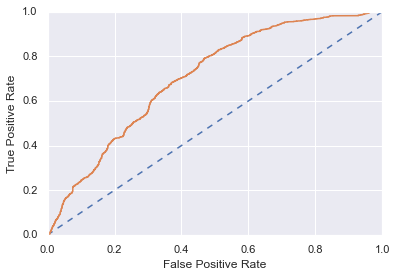

In [186]:
# predict probabilities
probs = model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
sm_lr_train_auc = roc_auc_score(train_labels_res, probs)
print('AUC: %.3f' % sm_lr_train_auc)
# calculate roc curve
sm_lr_train_fpr, sm_lr_train_tpr, sm_lr_train_thresholds = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(sm_lr_train_fpr, sm_lr_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data.**

In [187]:
sm_lr_confusion_matrix_train=confusion_matrix(train_labels_res, sm_lr_ytrain_predict_)
sm_lr_confusion_matrix_train

array([[1425,  925],
       [ 708, 1642]], dtype=int64)

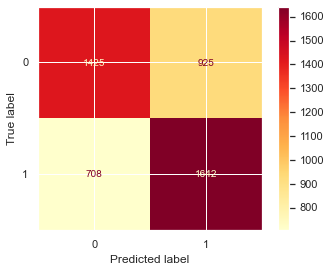

In [188]:
plot_confusion_matrix(model,X_train_res,train_labels_res,colorbar=True,cmap='YlOrRd')

**Train Data Accuracy.**

In [189]:
sm_lr_train_acc=model.score(X_train_res,train_labels_res)
sm_lr_train_acc

0.6525531914893618

**Classification Report of Training Data.**

In [190]:
print(classification_report(train_labels_res, sm_lr_ytrain_predict_))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64      2350
           1       0.64      0.70      0.67      2350

    accuracy                           0.65      4700
   macro avg       0.65      0.65      0.65      4700
weighted avg       0.65      0.65      0.65      4700



**AUC and ROC for the Test Data.**

AUC: 0.654


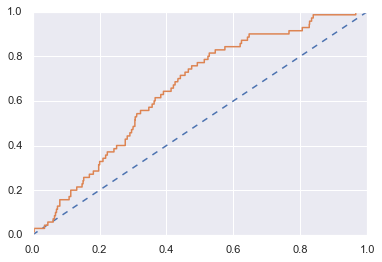

In [191]:
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
sm_lr_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % sm_lr_test_auc)
# calculate roc curve
sm_lr_test_fpr, sm_lr_test_tpr, sm_lr_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(sm_lr_test_fpr, sm_lr_test_tpr)

**Confusion Matrix for Test Data.**

In [192]:
sm_lr_confusion_matrix_test=confusion_matrix(test_labels, sm_lr_ytest_predict)
sm_lr_confusion_matrix_test

array([[606, 402],
       [ 25,  45]], dtype=int64)

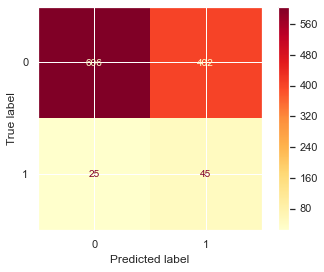

In [193]:
plot_confusion_matrix(model,X_test,test_labels,colorbar=True,cmap='YlOrRd')

**Test Data Accuracy**

In [194]:
sm_lr_test_acc=model.score(X_test,test_labels)
sm_lr_test_acc

0.6038961038961039

**Classification Report of Test Data.**

In [195]:
print(classification_report(test_labels, sm_lr_ytest_predict))

              precision    recall  f1-score   support

           0       0.96      0.60      0.74      1008
           1       0.10      0.64      0.17        70

    accuracy                           0.60      1078
   macro avg       0.53      0.62      0.46      1078
weighted avg       0.90      0.60      0.70      1078



**Model 8 - Random Forest with SMOTE**

In [196]:
from sklearn.ensemble import RandomForestClassifier
sm_rfcl = RandomForestClassifier()
sm_rfcl = rfcl.fit(X_train_res, train_labels_res)
sm_rfcl

RandomForestClassifier()

**Variable Importance**

In [197]:
print(
    pd.DataFrame(sm_rfcl.feature_importances_,
                 columns=["Imp"],
                 index=X_train_res.columns).sort_values('Imp', ascending=False))

                                                     Imp
PAT_as_perc_of_net_worth                        0.106469
EPS                                             0.082223
Cumulative_retained_profits                     0.056869
PBT                                             0.056512
TOL_to_TNW                                      0.052477
PAT_as_perc_of_total_income                     0.049102
Adjusted_EPS                                    0.045160
Profit_after_tax                                0.044519
Debt_to_equity_ratio_times                      0.043728
Cash_profit_as_perc_of_total_income             0.036354
Cash_profit                                     0.034174
Shareholders_funds                              0.032614
Net_worth                                       0.031487
PBT_as_perc_of_total_income                     0.029905
Reserves_and_funds                              0.022120
Current_ratio_times                             0.018218
PBDITA                         

**Predicting on Training and Test dataset**

In [198]:
sm_rf_ytrain_predict = sm_rfcl.predict(X_train_res)
sm_rf_ytest_predict = sm_rfcl.predict(X_test)

In [199]:
sm_rf_ytrain_predict 

array([0, 0, 1, ..., 1, 1, 1])

In [200]:
sm_rf_ytest_predict

array([0, 0, 0, ..., 0, 0, 0])

**Getting the Predicted Probability**

In [201]:
sm_rf_ytrain_predict_prob=sm_rfcl.predict_proba(X_train_res)
sm_rf_ytrain_predict_prob
pd.DataFrame(sm_rf_ytrain_predict_prob).head()

0         1
0  1.000000  0.000000
1  1.000000  0.000000
2  0.023333  0.976667
3  0.890000  0.110000
4  0.890000  0.110000

In [202]:
sm_rf_ytest_predict_prob=sm_rfcl.predict_proba(X_test)
sm_rf_ytest_predict_prob
pd.DataFrame(sm_rf_ytest_predict_prob).head()

0     1
0  0.95  0.05
1  1.00  0.00
2  0.94  0.06
3  1.00  0.00
4  0.96  0.04

**Model Evaluation - Random Forest Base Model**

**AUC and ROC for the Training Data**

AUC: 1.000


Text(0, 0.5, 'True Positive Rate')

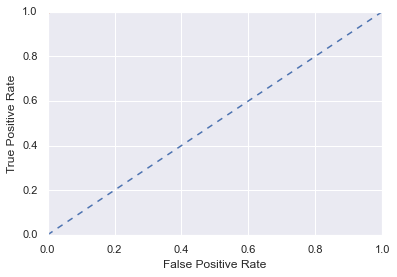

In [203]:
# predict probabilities
probs = sm_rfcl.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
sm_rf_train_auc = roc_auc_score(train_labels_res, probs)
print('AUC: %.3f' % sm_rf_train_auc)
# calculate roc curve
sm_rf_train_fpr, sm_rf_train_tpr, sm_rf_train_thresholds = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(sm_rf_train_fpr, sm_rf_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [204]:
sm_rf_confusion_matrix_train=confusion_matrix(train_labels_res, sm_rf_ytrain_predict)
sm_rf_confusion_matrix_train

array([[2332,   18],
       [   2, 2348]], dtype=int64)

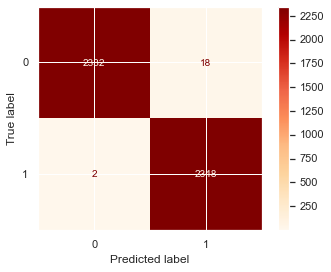

In [205]:
plot_confusion_matrix(sm_rfcl,X_train_res,train_labels_res,colorbar=True,cmap='OrRd')

**Train Data Accuracy**

In [206]:
sm_rf_train_acc=sm_rfcl.score(X_train_res,train_labels_res)
sm_rf_train_acc

0.9957446808510638

**Classification Report of Training Data**

In [207]:
print(classification_report(train_labels_res, sm_rf_ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2350
           1       0.99      1.00      1.00      2350

    accuracy                           1.00      4700
   macro avg       1.00      1.00      1.00      4700
weighted avg       1.00      1.00      1.00      4700



**AUC and ROC for the Test Data**

AUC: 0.874


Text(0, 0.5, 'True Positive Rate')

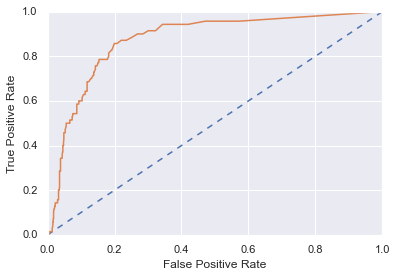

In [208]:
# predict probabilities
probs = sm_rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# calculate AUC
sm_rf_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % sm_rf_test_auc)
# calculate roc curve
sm_rf_test_fpr, sm_rf_test_tpr, sm_rf_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(sm_rf_test_fpr, sm_rf_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for Test Data**

In [209]:
sm_rf_confusion_matrix_test=confusion_matrix(test_labels, sm_rf_ytest_predict)
sm_rf_confusion_matrix_test


array([[960,  48],
       [ 41,  29]], dtype=int64)

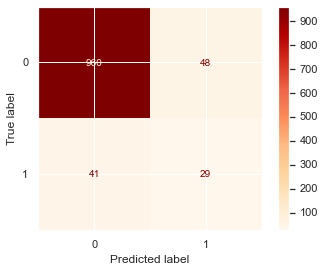

In [210]:
plot_confusion_matrix(sm_rfcl,X_test,test_labels,colorbar=True,cmap='OrRd')

**Test Data Accuracy**

In [211]:
sm_rf_test_acc=rfcl.score(X_test,test_labels)
sm_rf_test_acc

0.9174397031539888

**Classifiaction Report of Test Data**

In [212]:
print(classification_report(test_labels, sm_rf_ytest_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1008
           1       0.38      0.41      0.39        70

    accuracy                           0.92      1078
   macro avg       0.67      0.68      0.68      1078
weighted avg       0.92      0.92      0.92      1078



**Model 9 -  Bagging of Random Forest with SMOTE**

In [213]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
sm_rf_bag = RandomForestClassifier()
sm_Bagging_model=BaggingClassifier(base_estimator=sm_rf_bag,n_estimators=100,random_state=1)
sm_Bagging_model.fit(X_train_res,train_labels_res)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

**Predicting the Training and Testing data**

In [214]:
sm_rf_bag_ytrain_predict = sm_Bagging_model.predict(X_train_res)
sm_rf_bag_ytest_predict = sm_Bagging_model.predict(X_test)

In [215]:
sm_rf_bag_ytrain_predict 

array([0, 0, 1, ..., 1, 1, 1])

In [216]:
sm_rf_bag_ytest_predict

array([0, 0, 0, ..., 0, 0, 0])

**Getting the Predicted Probability**

In [217]:
sm_rf_bag_ytrain_predict
sm_rf_bag_ytrain_predict_prob=sm_Bagging_model.predict_proba(X_train_res)
sm_rf_bag_ytrain_predict_prob
pd.DataFrame(sm_rf_bag_ytrain_predict_prob).head()

0         1
0  0.998000  0.002000
1  0.994100  0.005900
2  0.057157  0.942843
3  0.866146  0.133854
4  0.814500  0.185500

In [218]:
sm_rf_bag_ytest_predict
sm_rf_bag_ytest_predict_prob=sm_Bagging_model.predict_proba(X_test)
sm_rf_bag_ytest_predict_prob
pd.DataFrame(sm_rf_bag_ytest_predict_prob).head()

0         1
0  0.902412  0.097588
1  0.998500  0.001500
2  0.851780  0.148220
3  0.986000  0.014000
4  0.965733  0.034267

**Model Evaluation - Bagging of Random Forest**

**AUC and ROC for the Training Data**

AUC: 1.000


Text(0, 0.5, 'True Positive Rate')

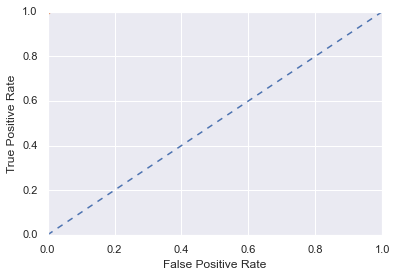

In [219]:
# predict probabilities
probs = sm_Bagging_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
sm_rf_bag_train_auc = roc_auc_score(train_labels_res, probs)
print('AUC: %.3f' % sm_rf_bag_train_auc)
# calculate roc curve
sm_rf_bag_train_fpr, sm_rf_bag_train_tpr, sm_rf_bag_train_thresholds = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(sm_rf_bag_train_fpr, sm_rf_bag_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [220]:
sm_rf_bag_confusion_matrix_train=confusion_matrix(train_labels_res, sm_rf_bag_ytrain_predict)
sm_rf_bag_confusion_matrix_train

array([[2317,   33],
       [   2, 2348]], dtype=int64)

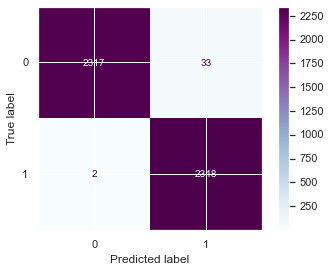

In [221]:
plot_confusion_matrix(sm_Bagging_model,X_train_res,train_labels_res,colorbar=True,cmap='BuPu')

**Train Data Accuracy**

In [222]:
sm_rf_bag_train_acc=sm_Bagging_model.score(X_train_res,train_labels_res)
sm_rf_bag_train_acc

0.9925531914893617

**Classification Report of Train Data**

In [223]:
print(classification_report(train_labels_res, sm_rf_bag_ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2350
           1       0.99      1.00      0.99      2350

    accuracy                           0.99      4700
   macro avg       0.99      0.99      0.99      4700
weighted avg       0.99      0.99      0.99      4700



**AUC and ROC for the Test Data**

AUC: 0.894


Text(0, 0.5, 'True Positive Rate')

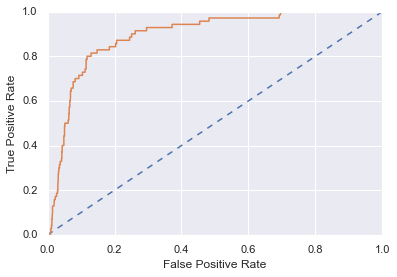

In [224]:
# predict probabilities
probs = sm_Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[: ,1]
# calculate AUC
sm_rf_bag_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % sm_rf_bag_test_auc)
# calculate roc curve
sm_rf_bag_test_fpr, sm_rf_bag_test_tpr, sm_rf_bag_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(sm_rf_bag_test_fpr, sm_rf_bag_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for Test Data**

In [225]:
sm_rf_bag_confusion_matrix_test=confusion_matrix(test_labels, sm_rf_bag_ytest_predict)
sm_rf_bag_confusion_matrix_test

array([[946,  62],
       [ 35,  35]], dtype=int64)

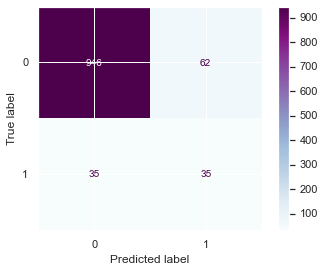

In [226]:
plot_confusion_matrix(sm_Bagging_model,X_test,test_labels,colorbar=True,cmap='BuPu')

**Test Data Accuracy**

In [227]:
sm_rf_bag_test_acc=sm_Bagging_model.score(X_test,test_labels)
sm_rf_bag_test_acc

0.9100185528756958

**Classifiaction Report of Test Data**

In [228]:
print(classification_report(test_labels, sm_rf_bag_ytest_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1008
           1       0.36      0.50      0.42        70

    accuracy                           0.91      1078
   macro avg       0.66      0.72      0.69      1078
weighted avg       0.93      0.91      0.92      1078



**Model 10 - Gradient Boosting Model with SMOTE**

In [229]:
from sklearn.ensemble import GradientBoostingClassifier
sm_gbcl = GradientBoostingClassifier(random_state=1)
sm_gbcl = sm_gbcl.fit(X_train_res,train_labels_res)

**Predicting the Training and Testing data**

In [230]:
sm_gbcl_ytrain_predict = sm_gbcl.predict(X_train_res)
sm_gbcl_ytest_predict = sm_gbcl.predict(X_test)

In [231]:
sm_gbcl_ytrain_predict

array([0, 0, 1, ..., 1, 1, 1])

In [232]:
sm_gbcl_ytest_predict

array([0, 0, 0, ..., 0, 0, 0])

**Getting the Predicted Probability**

In [233]:
sm_gbcl_ytrain_predict
sm_gbcl_ytrain_predict_prob=sm_gbcl.predict_proba(X_train_res)
sm_gbcl_ytrain_predict_prob
pd.DataFrame(sm_gbcl_ytrain_predict_prob).head()

0         1
0  0.980698  0.019302
1  0.984065  0.015935
2  0.024854  0.975146
3  0.956223  0.043777
4  0.943928  0.056072

In [234]:
sm_gbcl_ytest_predict
sm_gbcl_ytest_predict_prob=sm_gbcl.predict_proba(X_test)
sm_gbcl_ytest_predict_prob
pd.DataFrame(sm_gbcl_ytest_predict_prob).head()

0         1
0  0.912892  0.087108
1  0.988396  0.011604
2  0.767304  0.232696
3  0.992899  0.007101
4  0.944093  0.055907

**Model Evaluation - Gradient Boosting Model**

**AUC and ROC for the Training Data**

AUC: 0.997


Text(0, 0.5, 'True Positive Rate')

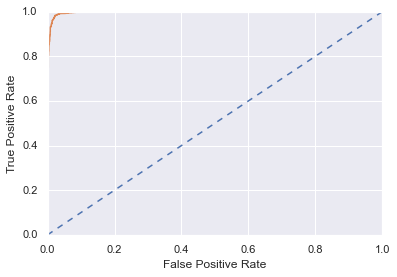

In [235]:
# predict probabilities
probs = sm_gbcl.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
sm_gbcl_train_auc = roc_auc_score(train_labels_res, probs)
print('AUC: %.3f' % sm_gbcl_train_auc)
# calculate roc curve
sm_gbcl_train_fpr, sm_gbcl_train_tpr, sm_gbcl_train_thresholds = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(sm_gbcl_train_fpr, sm_gbcl_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Confusion Matrix for the Training Data**

In [236]:
sm_gbcl_confusion_matrix_train=confusion_matrix(train_labels_res, sm_gbcl_ytrain_predict)
sm_gbcl_confusion_matrix_train

array([[2280,   70],
       [  30, 2320]], dtype=int64)

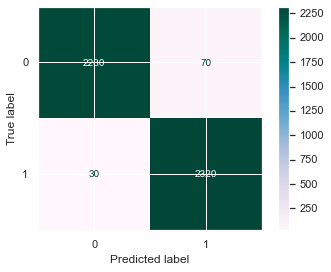

In [237]:
plot_confusion_matrix(sm_gbcl,X_train_res,train_labels_res,colorbar=True,cmap='PuBuGn')

**Train Data Accuracy**

In [238]:
sm_gbcl_train_acc=sm_gbcl.score(X_train_res,train_labels_res)
sm_gbcl_train_acc

0.9787234042553191

**Classification Report of Train Data**

In [239]:
print(classification_report(train_labels_res, sm_gbcl_ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2350
           1       0.97      0.99      0.98      2350

    accuracy                           0.98      4700
   macro avg       0.98      0.98      0.98      4700
weighted avg       0.98      0.98      0.98      4700



**AUC and ROC for the Test Data**

AUC: 0.896


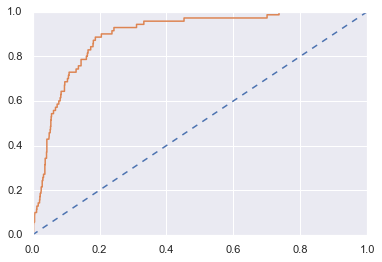

In [240]:
probs = sm_gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
sm_gbcl_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % sm_gbcl_test_auc)
# calculate roc curve
sm_gbcl_test_fpr, sm_gbcl_test_tpr, sm_gbcl_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(sm_gbcl_test_fpr, sm_gbcl_test_tpr)

**Confusion Matrix for Test Data**

In [241]:
sm_gbcl_confusion_matrix_test=confusion_matrix(test_labels, sm_gbcl_ytest_predict)
sm_gbcl_confusion_matrix_test

array([[941,  67],
       [ 31,  39]], dtype=int64)

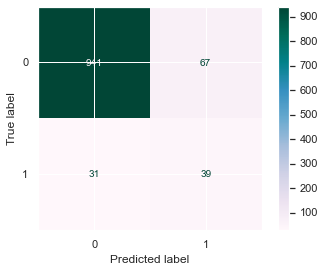

In [242]:
plot_confusion_matrix(sm_gbcl,X_test,test_labels,colorbar=True,cmap='PuBuGn')

**Test Data Accuracy**

In [243]:
sm_gbcl_test_acc=sm_gbcl.score(X_test,test_labels)
sm_gbcl_test_acc

0.9090909090909091

**Classifiaction Report of Test Data**

In [244]:
print(classification_report(test_labels, sm_gbcl_ytest_predict))


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1008
           1       0.37      0.56      0.44        70

    accuracy                           0.91      1078
   macro avg       0.67      0.75      0.70      1078
weighted avg       0.93      0.91      0.92      1078



                                   The End